#<font color=”Blue”> ***1.Introduction***</font>

L' infection rénale chronique (IRC) est une affection courante qui fait référence à une perte à long terme de la fonction rénale, affectant des millions de personnes dans le monde. Plus de deux millions de personnes dans le monde reçoivent une dialyse, une greffe de rein ou un autre type de traitement pour rester en vie, atteignant seulement 10% des cas. Un autre aspect est que seulement 20% de la population est traitée dans les pays en développement, soit seulement la moitié de la population mondiale . 
L'IRC est une affection courante qui ne se manifeste pas immédiatement, entraînant l'absence de symptômes dans les premiers stades, étant dévaluée et ignorée par les personnes atteintes de cette maladie. La perte progressive de fonction, conduit à l'apparition de la pathologie à un stade très avancé . En tant qu'une maladie asymptomatique, ses complications ne sont pas facilement détectées et peuvent être confondues avec d'autres types de maladies. La plupart du temps, l'IRC est détectée lors d'une insuffisance rénale, ce qui entraîne des mesures extrêmes telles que la greffe rénale et, si elles n'en résultent pas, la mort. L'IRC ne peut être diagnostiquée à un stade précoce que par des néphrologues et des urologues expérimentés en utilisant les antécédents de la maladie, les symptômes et les tests de laboratoire. L'IRC comporte cinq stades de lésions rénales, allant de très légères lésions au stade 1 à une insuffisance rénale complète au stade 5, comme on peut le voir sur la figure  ci dessous ;

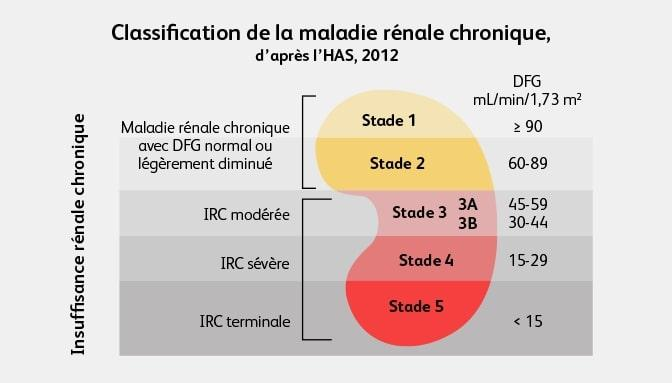

L'état des personnes qui nécessitent l'un des deux types de thérapie de remplacement rénal, la dialyse ou la greffe, est appelée maladie rénale en phase terminale . Afin d'empêcher les personnes atteintes de cette maladie d'atteindre la phase terminale, les techniques de prédiction de la maladie à un stade précoce deviennent un avantage et peuvent sauver des vies. Dans le domaine de la santé, la "Data Mining" DM a été largement utilisé pour prédire et classer les variables cliniques à l'aide des données stockées dans les systèmes d'information hospitaliers (HIS), qui peuvent être nettoyées et analysées à l'aide de techniques d'exploration de données . DM est généralement utilisé pour extraire des informations utiles à partir de données brutes. Les techniques de DM peuvent aider à découvrir des informations cachées pour une meilleure prise de décision, découvrir des modèles cachés et des relations inexploitées .

Ce projet vise à le cadre d'application des outils vus dans le cours de module de Data & Web Migning dans un domaine de la santé, et qu'on en a choisit l'IRC, se concentre sur les techniques de classification, en particulier dans le développement d'un classificateur capable de prédire un individu en tant que ckd (possesseur de la maladie) ou notckd (non possesseur de la maladie), en utilisant la méthodologie CRISP-DM et les algorithmes de la "Machine Learning" sur notebook jubyter.

#<font color=”Blue”> ***2. Methodologie : CRISP-DM***</font>

CRISP-DM (cross-industry process for data mining)" est synonyme de processus intersectoriel pour l'exploration de données. La méthodologie CRISP-DM fournit une approche structurée pour planifier un projet d'exploration de données. C'est une méthodologie robuste et éprouvée. , sa flexibilité et son utilité lors de l'utilisation de l'analytique pour résoudre des problèmes épineux. C'est le fil d'or qui traverse presque tous les engagements clients. Le modèle CRISP-DM shématisé ci-dessous est une séquence idéalisée d'événements. Dans la pratique, de nombreuses tâches peuvent être effectuées dans un ordre différent et il sera souvent nécessaire de revenir aux tâches précédentes  et de répéter certaines actions. Le modèle n'essaie pas de capturer toutes les routes possibles à travers le processus d'exploration de données."

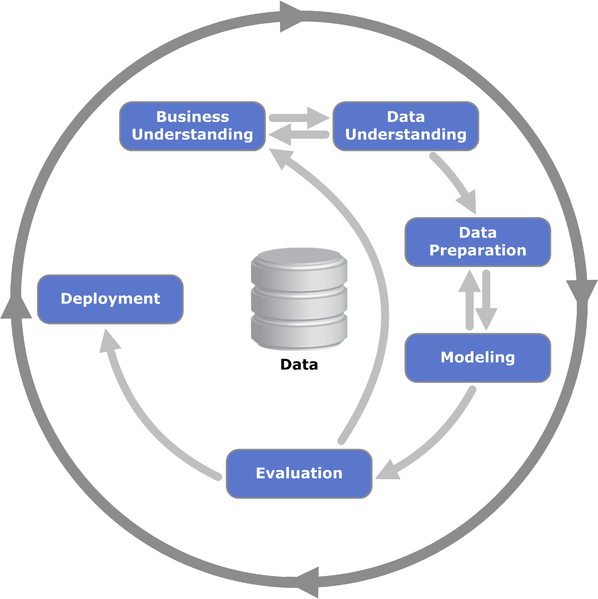

### **2.1** **Business Understanding**

La prédiction précoce et les traitements appropriés peuvent éventuellement arrêter ou ralentir la progression de l’IRC au stade terminal, où la dialyse ou la transplantation rénale sont le seul moyen de sauver la vie du patient. Il devient de plus en plus important d’utiliser ce type de prédictions car il est basé sur des informations de patients réels, permettant la création de modèles de prédiction qui aident les professionnels de santé dans leurs décisions. Dans ce contexte, cette ce projet vise à prédire les cas d'IRC à un stade précoce en se basant sur des données cliniques grâce à l'utilisation de techniques de DM.

### **2.2** **Data Understanding**

Dans ce projet, on a  utilisé une base de données liées à la détection de l'IRC, collectées dans un hôpital en Inde sur une période de 2 mois. cette dataset contient des informations sur 400 patients et 24 caractéristiques importantes pour identifier les facteurs de risque d'IRC et améliorer le diagnostic des cas de patients atteints d'IRC. L'ensemble de données contient des données personnelles, des données de tests de laboratoire sur le sang et l'urine et des données sur les antécédents cliniques du patient. Les attributs de l'ensemble de données sont présentés ci-aprés.

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True )

Mounted at /content/drive


In [ ]:
#Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/kidney_disease.csv')
df = pd.read_csv('/content/drive/MyDrive/DataMinig/kidney_disease.csv')

In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
#Renommer les colonnes pour avoir des noms significatifs
cols_names={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"hemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

df.rename(columns=cols_names, inplace=True)

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,400,NaN,NaN,NaN,199.5,115.614,0,99.75,199.5,299.25,399
age,391,NaN,NaN,NaN,51.4834,17.1697,2,42,55,64.5,90
blood_pressure,388,NaN,NaN,NaN,76.4691,13.6836,50,70,80,80,180
specific_gravity,353,NaN,NaN,NaN,1.01741,0.00571662,1.005,1.01,1.02,1.02,1.025
albumin,354,NaN,NaN,NaN,1.01695,1.35268,0,0,0,2,5
sugar,351,NaN,NaN,NaN,0.450142,1.09919,0,0,0,0,5
red_blood_cells,248,2,normal,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pus_cell,335,2,normal,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pus_cell_clumps,396,2,notpresent,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bacteria,396,2,notpresent,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

Notre variable cible "classification " indique "ckd" pour les cas qu'ont un IRC  et "notckd" pour les personnes qui n'ont pas d'IRC. 

L'attribut cible a une distribution déséquilibrée avec 250 cas
correspondant à ckd et seulement 150 à notckd

Comme on peut le voir, red_blood_cell_count, packed_cell_volume et white_blood_cell_count sont des types d'objets. Nous devons passer au dtype numérique.

### **2.2.1 Vérification des valeurs manquantes**


In [ ]:
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       130
white_blood_cell_count     105
potassium                   88
sodium                      87
packed_cell_volume          70
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
anemia                       1
appetite                     1
pedal_edema                  1
classification               0
id                           0
dtype: int64

Il est évident qu'il y a beaucoup de valeurs manquantes. Un très mauvais moyen serait de les laisser tomber. Mais nous les traiterons de manière intelligente dans le prochain notebook sur le prétraitement.

Traçons également le pourcentage de valeurs manquantes pour toutes les caractéristiques.

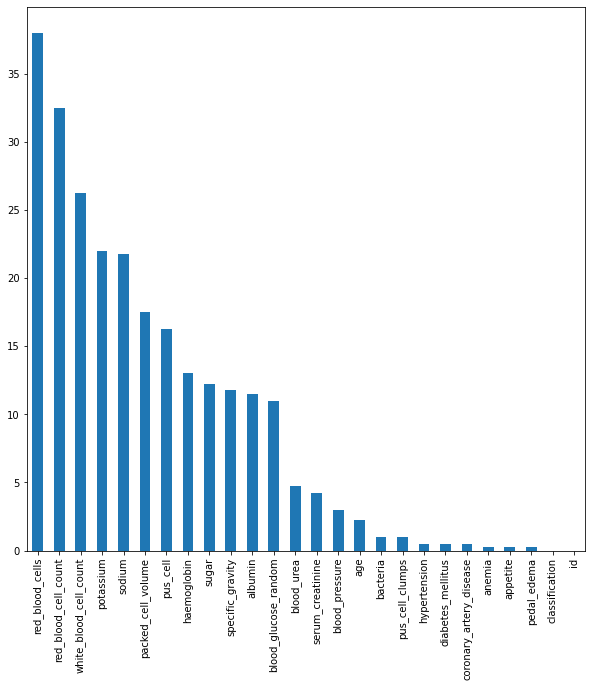

In [ ]:
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False).plot(kind='bar', figsize=(10,10))


### **2.2.2 Vérification des valeurs uniques et des caractéristiques catégorielles**



In [ ]:
for i in df.columns:
    print(f'{i} : {df[i].nunique()} values')

id : 400 values
age : 76 values
blood_pressure : 10 values
specific_gravity : 5 values
albumin : 6 values
sugar : 6 values
red_blood_cells : 2 values
pus_cell : 2 values
pus_cell_clumps : 2 values
bacteria : 2 values
blood_glucose_random : 146 values
blood_urea : 118 values
serum_creatinine : 84 values
sodium : 34 values
potassium : 40 values
haemoglobin : 115 values
packed_cell_volume : 44 values
white_blood_cell_count : 92 values
red_blood_cell_count : 49 values
hypertension : 2 values
diabetes_mellitus : 5 values
coronary_artery_disease : 3 values
appetite : 2 values
pedal_edema : 2 values
anemia : 2 values
classification : 3 values


In [ ]:
numerical_features = []
categorical_features = []

for i in df.columns:
    if df[i].nunique()>7:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

In [ ]:
print('Numerical features: ', numerical_features)
print('\nCategorical features: ', categorical_features)

Numerical features:  ['id', 'age', 'blood_pressure', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']

Categorical features:  ['specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'classification']


Recherchons des valeurs uniques dans les caractéristiques catégorielles :

In [ ]:
for feats in categorical_features:
    print(f'{feats} a {df[feats].unique()} categories.\n')

specific_gravity a [1.02  1.01  1.005 1.015   nan 1.025] categories.

albumin a [ 1.  4.  2.  3.  0. nan  5.] categories.

sugar a [ 0.  3.  4.  1. nan  2.  5.] categories.

red_blood_cells a [nan 'normal' 'abnormal'] categories.

pus_cell a ['normal' 'abnormal' nan] categories.

pus_cell_clumps a ['notpresent' 'present' nan] categories.

bacteria a ['notpresent' 'present' nan] categories.

hypertension a ['yes' 'no' nan] categories.

diabetes_mellitus a ['yes' 'no' ' yes' '\tno' '\tyes' nan] categories.

coronary_artery_disease a ['no' 'yes' '\tno' nan] categories.

appetite a ['good' 'poor' nan] categories.

pedal_edema a ['no' 'yes' nan] categories.

anemia a ['no' 'yes' nan] categories.

classification a ['ckd' 'ckd\t' 'notckd'] categories.



Nous devons donc corriger 2 caractéristiques et la variable cible qui contiennent un certain écart dans certaines valeurs.

In [ ]:
#Replace incorrect values
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'})
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
df['classification'] = df['classification'].replace(to_replace = 'ckd\t', value = 'ckd')

In [ ]:
for feats in categorical_features:
    print(f'{feats} a {df[feats].unique()} categories.\n')

specific_gravity a [1.02  1.01  1.005 1.015   nan 1.025] categories.

albumin a [ 1.  4.  2.  3.  0. nan  5.] categories.

sugar a [ 0.  3.  4.  1. nan  2.  5.] categories.

red_blood_cells a [nan 'normal' 'abnormal'] categories.

pus_cell a ['normal' 'abnormal' nan] categories.

pus_cell_clumps a ['notpresent' 'present' nan] categories.

bacteria a ['notpresent' 'present' nan] categories.

hypertension a ['yes' 'no' nan] categories.

diabetes_mellitus a ['yes' 'no' nan] categories.

coronary_artery_disease a ['no' 'yes' nan] categories.

appetite a ['good' 'poor' nan] categories.

pedal_edema a ['no' 'yes' nan] categories.

anemia a ['no' 'yes' nan] categories.

classification a ['ckd' 'notckd'] categories.



### **2.2.3 Vérification de la distribution des fonctionnalités**

Commençons par vérifier la répartition des caractéristiques numériques.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

ValueError: ignored

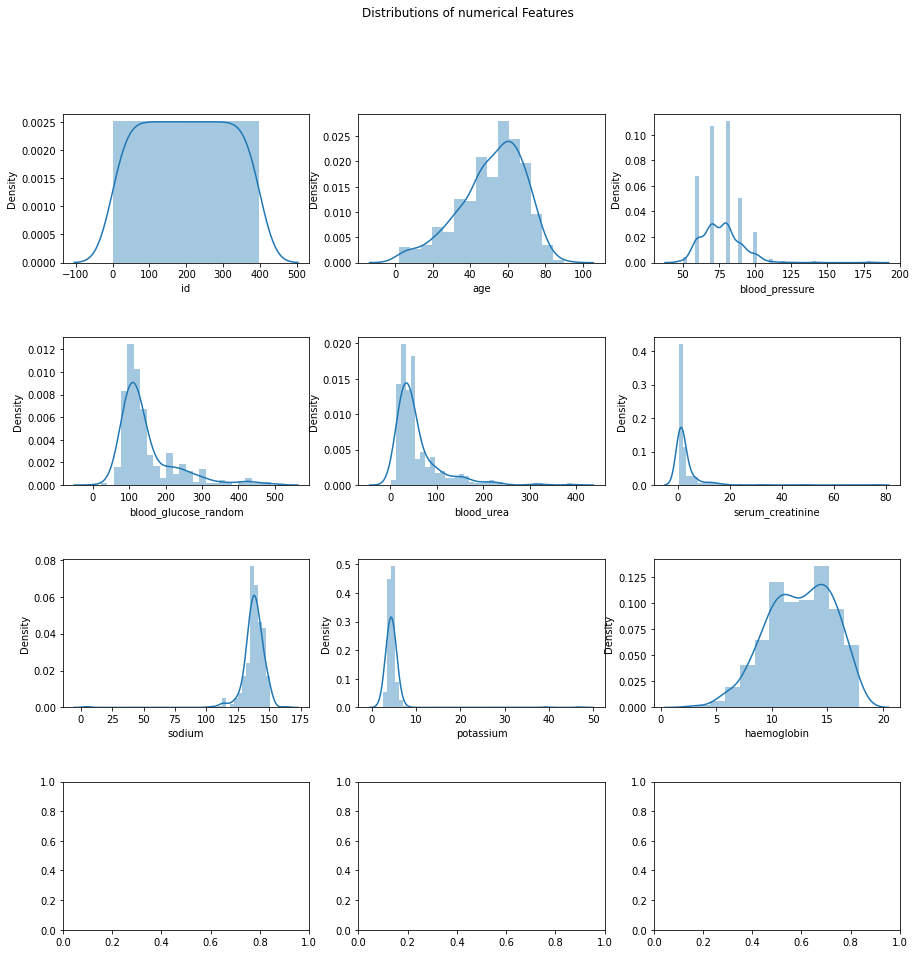

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of numerical Features')


for ax, feats in zip(axes.flatten(), numerical_features):
    sns.distplot(a=df[feats], ax=ax)

Observations:

*   l'âge semble un peu faussé
*   Le hasard de la glycémie est biaisé à droite
*   L'urée du sang est également un peu biaisée à droite
*   Les autres caractéristiques sont légèrement biaisées











Maintenant, vérifions la distribution des étiquettes pour les données catégorielles.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

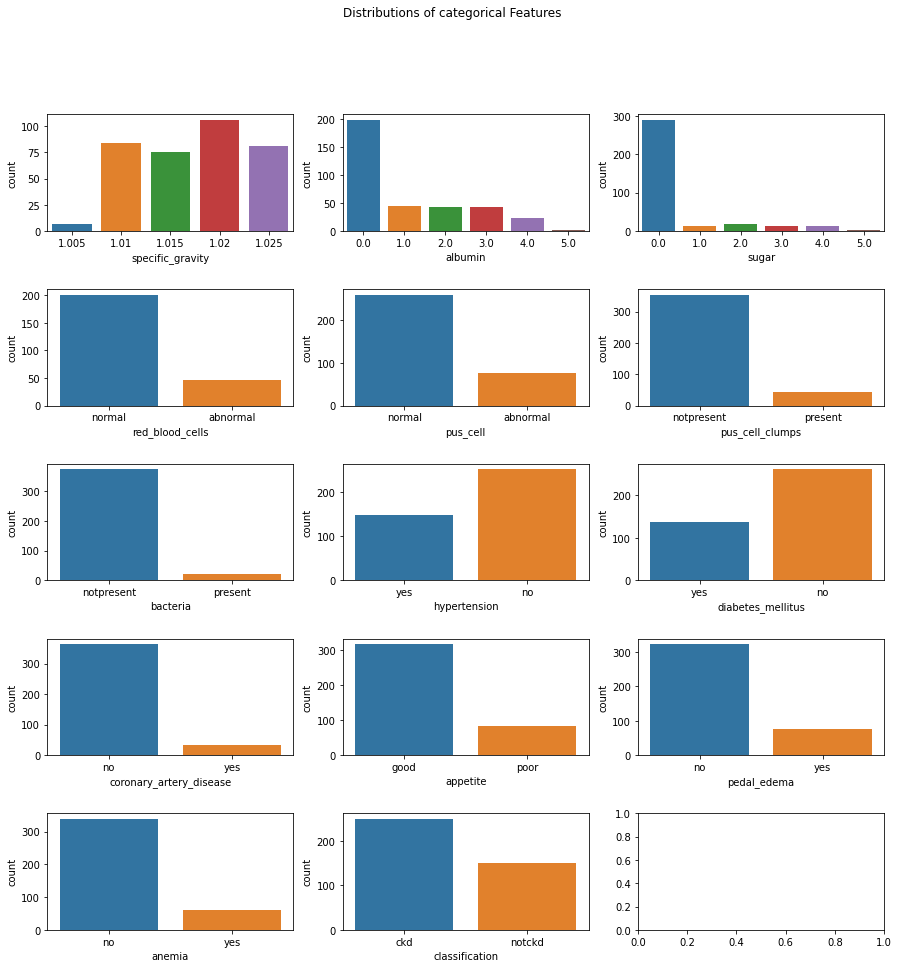

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of categorical Features')


for ax, feats in zip(axes.flatten(), categorical_features):
    sns.countplot(df[feats], ax=ax)

Quelques caractéristiques ont des catégories déséquilibrées. 

Des plis stratifiés seront nécessaires lors de la validation croisée.

### **2.2.4 Vérifions également s'il existe un déséquilibre entre les classes** 

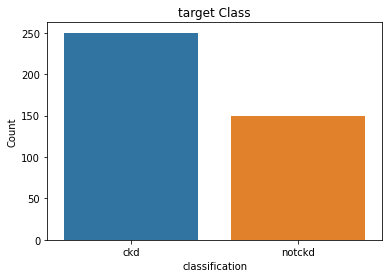

Pourcentage de léchantillon sur les maladies rénales chroniques : 62.5 %
Pourcentage déchantillons ne présentant pas de maladie rénale chronique : 37.5 %


In [ ]:
sns.countplot(x='classification',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()

print('Pourcentage de l''échantillon sur les maladies rénales chroniques :',round(len(df[df['classification']=='ckd'])/len(df['classification'])*100,2),"%")
print('Pourcentage d''échantillons ne présentant pas de maladie rénale chronique :',round(len(df[df['classification']=='notckd'])/len(df['classification'])*100,2),"%")

De toute évidence, les classes ne sont pas très déséquilibrées.

### **2.2.5 Correlation**

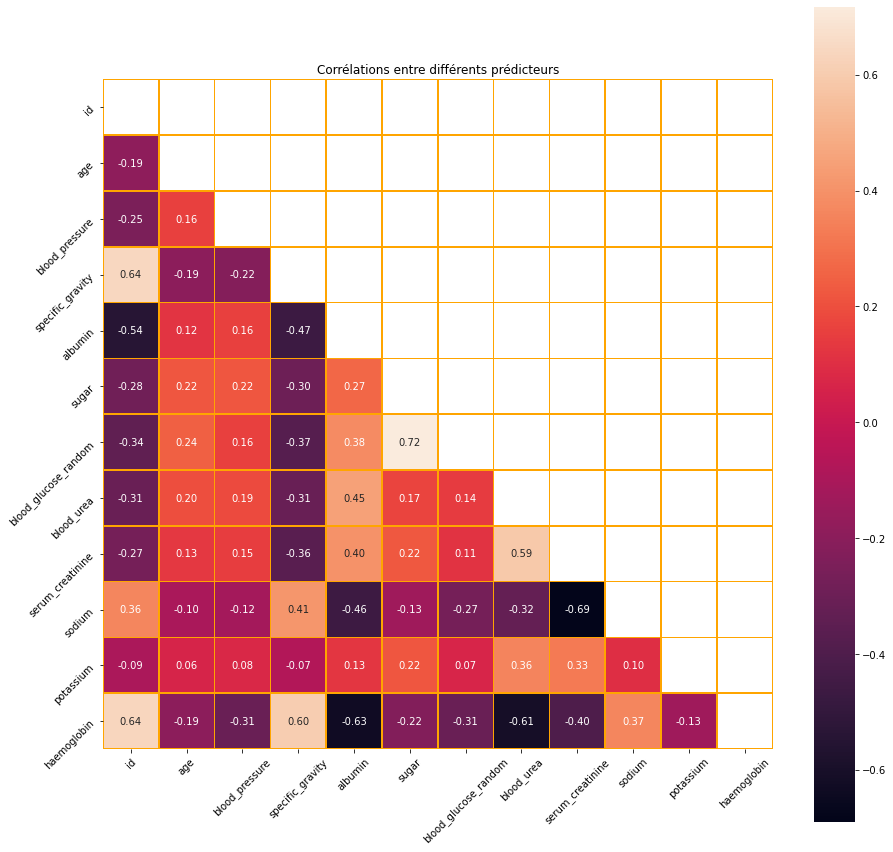

In [ ]:
corr_df = df.corr()
f,ax=plt.subplots(figsize=(15,15))
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange", mask = mask, square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Corrélations entre différents prédicteurs')
plt.show()

Positive Correlation:

1. Specific gravity -> Red blood cell count, Packed cell volume and Hemoglobin

2. Sugar -> Blood glucose random

3. Blood Urea -> Serum creatinine

4. Hemoglobin -> Red Blood cell count <- packed cell volume

Negative Correlation:

1. Albumin, Blood urea -> Red blood cell count, packed cell volume, Hemoglobin

2. Serum creatinine -> Sodium

### **2.3 Data Preparation**

une préparation et un netoyage des données est nécessaire avant de passer aux phases suivante. La première étape consistait à vérifier les incohérences dans les données, les valeurs en double, les valeurs aberrantes et les valeurs manquantes. Il a été constaté qu'il n'y avait pas de valeurs en double dans les données. Toutes les valeurs manquantes détectées ont été remplacées par le mode pour les attributs nominaux et par la moyenne pour les attributs numériques. puis la suppression des  des valeurs abberante detectées sur les données. aprés verification  de la corrélation , il a ete constaté que notre variable cible 'classification' est corrélée aux variables specific gravity, hemoglobine et  packed cell volume de respectivement  70%,69 et 65% , pour ce, on a enlever ces attributs. 

**- Netoyage de data**

In [ ]:
df1=df.copy()

Supprimer la colonne Id , et afficher les valeurs pour detecter les incoherences 

In [ ]:
df1.drop(["id"],axis=1,inplace=True) 

In [ ]:
for i in df1.columns:
    print("unique values in {}:".format(i),df1[i].unique())

unique values in age: [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in blood_pressure: [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in specific_gravity: [1.02  1.01  1.005 1.015   nan 1.025]
unique values in albumin: [ 1.  4.  2.  3.  0. nan  5.]
unique values in sugar: [ 0.  3.  4.  1. nan  2.  5.]
unique values in red_blood_cells: [nan 'normal' 'abnormal']
unique values in pus_cell: ['normal' 'abnormal' nan]
unique values in pus_cell_clumps: ['notpresent' 'present' nan]
unique values in bacteria: ['notpresent' 'present' nan]
unique values in blood_glucose_random: [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264

***Supprimer les incoherences d'ecriture des valeurs sur les variables : ***

In [ ]:
df1['diabetes_mellitus'] = df1['diabetes_mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'}) 
df1['coronary_artery_disease'] = df1['coronary_artery_disease'].replace(to_replace='\tno',value='no') 
df1['classification'] = df1['classification'].replace(to_replace='ckd\t',value='ckd')

**Corriger les types des variables red_blood_cell_count, packed_cell_volume et white_blood_cell_count qui figurent comme des objets pour les rendre de type numérique :**

In [ ]:
df1['red_blood_cell_count'] = pd.to_numeric(df1['red_blood_cell_count'], errors='coerce')
df1['packed_cell_volume'] = pd.to_numeric(df1['packed_cell_volume'], errors='coerce')
df1['white_blood_cell_count'] = pd.to_numeric(df1['white_blood_cell_count'], errors='coerce')

In [ ]:
for i in df1.columns:
    print("unique values in {}:".format(i),df1[i].unique())

unique values in age: [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in blood_pressure: [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in specific_gravity: [1.02  1.01  1.005 1.015   nan 1.025]
unique values in albumin: [ 1.  4.  2.  3.  0. nan  5.]
unique values in sugar: [ 0.  3.  4.  1. nan  2.  5.]
unique values in red_blood_cells: [nan 'normal' 'abnormal']
unique values in pus_cell: ['normal' 'abnormal' nan]
unique values in pus_cell_clumps: ['notpresent' 'present' nan]
unique values in bacteria: ['notpresent' 'present' nan]
unique values in blood_glucose_random: [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,391,NaN,NaN,NaN,51.4834,17.1697,2,42,55,64.5,90
blood_pressure,388,NaN,NaN,NaN,76.4691,13.6836,50,70,80,80,180
specific_gravity,353,NaN,NaN,NaN,1.01741,0.00571662,1.005,1.01,1.02,1.02,1.025
albumin,354,NaN,NaN,NaN,1.01695,1.35268,0,0,0,2,5
sugar,351,NaN,NaN,NaN,0.450142,1.09919,0,0,0,0,5
red_blood_cells,248,2,normal,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pus_cell,335,2,normal,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pus_cell_clumps,396,2,notpresent,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bacteria,396,2,notpresent,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blood_glucose_random,356,NaN,NaN,NaN,148.037,79.2817,22,99,121,163,490


***### Imputation des valeurs manquantes ***

Détecter les valeurs manquantes : 

In [ ]:
df.isna().sum().sort_values()

classification               0
pedal_edema                  1
appetite                     1
anemia                       1
coronary_artery_disease      2
diabetes_mellitus            2
hypertension                 2
pus_cell_clumps              4
bacteria                     4
age                          9
blood_pressure              12
serum_creatinine            17
blood_urea                  19
blood_glucose_random        44
albumin                     46
specific_gravity            47
sugar                       49
haemoglobin                 52
pus_cell                    65
packed_cell_volume          71
sodium                      87
potassium                   88
white_blood_cell_count     106
red_blood_cell_count       131
red_blood_cells            152
dtype: int64

Visualiser les valeurs manquantes

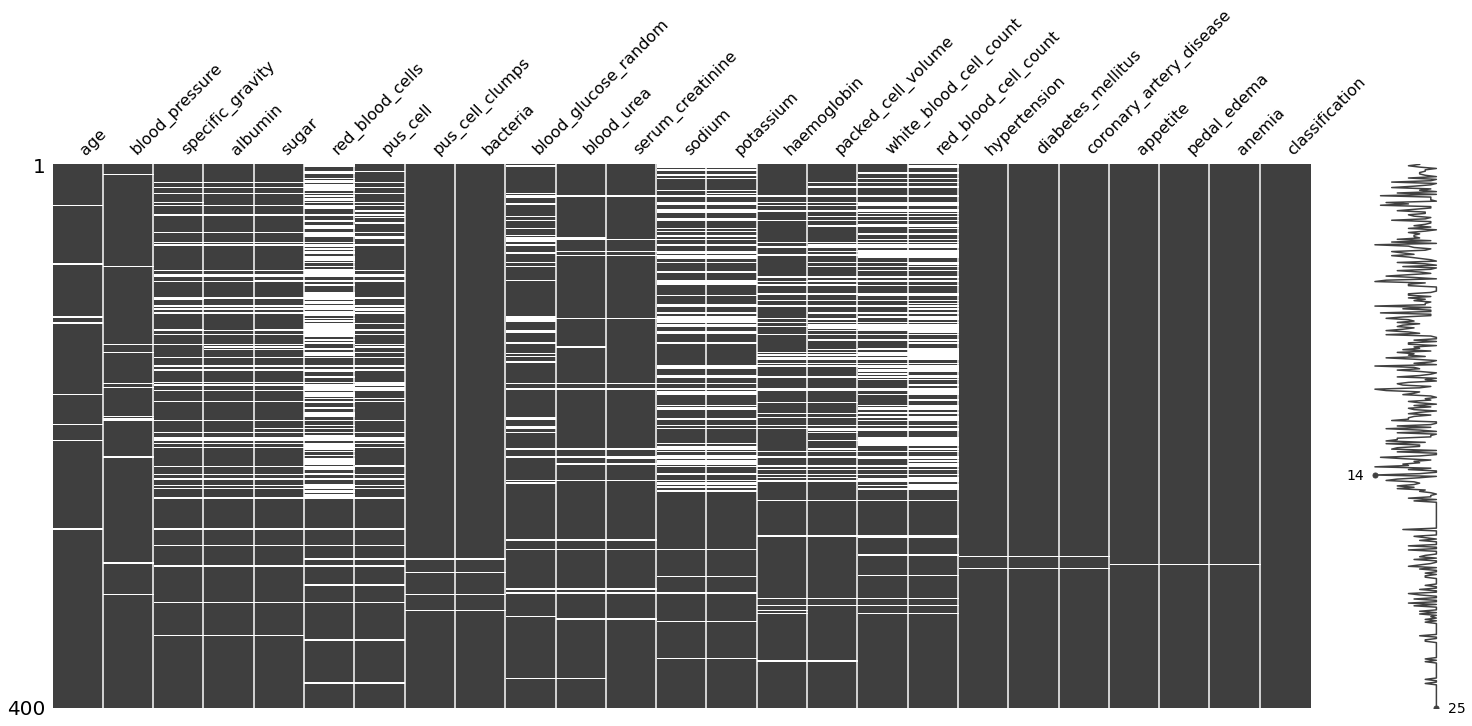

In [ ]:
import missingno as msno

msno.matrix(df)
plt.show()

### Pour les variables de type numérique : Remplacées  les valeurs manquantes par la moyenne  

In [ ]:
for i in ['age','blood_pressure','specific_gravity','albumin','sugar','blood_glucose_random','blood_urea','serum_creatinine','sodium','potassium','hemoglobin','red_blood_cell_count','white_blood_cell_count','packed_cell_volume']:
    df1[i].fillna(df1[i].mean(),inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      400 non-null    float64
 2   blood_pressure           400 non-null    float64
 3   specific_gravity         400 non-null    float64
 4   albumin                  400 non-null    float64
 5   sugar                    400 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     400 non-null    float64
 11  blood_urea               400 non-null    float64
 12  serum_creatinine         400 non-null    float64
 13  sodium                   400 non-null    float64
 14  potassium                4

### Remplacées  les valeurs manquantes par le mode  les variables de types non numériques

Mettres ces variables en type numérique de format binaire {0:1}

In [ ]:
df1[['hypertension','diabetes_mellitus','coronary_artery_disease','pedal_edema','anemia']] = df1[['hypertension','diabetes_mellitus','coronary_artery_disease','pedal_edema','anemia']].replace(to_replace={'yes':1,'no':0})
df1[['red_blood_cells','pus_cell']] = df1[['red_blood_cells','pus_cell']].replace(to_replace={'abnormal':1,'normal':0})
df1[['pus_cell_clumps','bacteria']] = df1[['pus_cell_clumps','bacteria']].replace(to_replace={'present':1,'notpresent':0})
df1[['appetite']] = df1[['appetite']].replace(to_replace={'good':1,'poor':0})
df1['classification'] = df1['classification'].replace(to_replace={'ckd':1,'notckd':0})

TypeError: ignored

In [ ]:
df1=df1.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    float64
 6   pus_cell                 400 non-null    float64
 7   pus_cell_clumps          400 non-null    float64
 8   bacteria                 400 non-null    float64
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  hemoglobin               4

### Detecter les valeurs abberantes et extrême

In [ ]:
def remove_outliers_using_quantiles(qu_dataset, qu_field, qu_fence):
    a = qu_dataset[qu_field].describe()
    
    iqr = a["75%"] - a["25%"]
    print("interquartile range:", iqr)
    
    upper_inner_fence = a["75%"] + 1.5 * iqr
    lower_inner_fence = a["25%"] - 1.5 * iqr
    print("upper_inner_fence:", upper_inner_fence)
    print("lower_inner_fence:", lower_inner_fence)
    
    upper_outer_fence = a["75%"] + 3 * iqr
    lower_outer_fence = a["25%"] - 3 * iqr
    print("upper_outer_fence:", upper_outer_fence)
    print("lower_outer_fence:", lower_outer_fence)
    
    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_inner_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_inner_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of inner fences: %.2f"% (percentage))
    
    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_outer_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_outer_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of outer fences: %.2f"% (percentage))
    
    if qu_fence == "inner":
        output_dataset = qu_dataset[qu_dataset[qu_field]<=upper_inner_fence]
        output_dataset = output_dataset[output_dataset[qu_field]>=lower_inner_fence]
    elif qu_fence == "outer":
        output_dataset = qu_dataset[qu_dataset[qu_field]<=upper_outer_fence]
        output_dataset = output_dataset[output_dataset[qu_field]>=lower_outer_fence]
    else:
        output_dataset = qu_dataset
    
    print("length of input dataframe:", len(qu_dataset))
    print("length of new dataframe after outlier removal:", len(output_dataset))
    
    return output_dataset

In [ ]:
#Garder toute les valeurs de l'age
df1.dropna(inplace=True)
new_dataset = remove_outliers_using_quantiles(df1, "age", "inner")

In [ ]:
# plot both together to compare

fig, ax=plt.subplots(1,2,figsize=(20,1))
sns.boxplot(df1["age"],ax=ax[0])
ax[0].set_title("age avec valeurs aberante")
sns.boxplot(new_dataset["age"],ax=ax[1])
ax[1].set_title("age aprés suppresion des valeurs aberante")

Supprimer les valeurs abberantes de blood pressure

In [ ]:
df1.dropna(inplace=True)
new_dataset1 = remove_outliers_using_quantiles(df1, "blood_pressure", "inner")

interquartile range: 10.0
upper_inner_fence: 95.0
lower_inner_fence: 55.0
upper_outer_fence: 110.0
lower_outer_fence: 40.0
percentage of records out of inner fences: 9.00
percentage of records out of outer fences: 0.75
length of input dataframe: 400
length of new dataframe after outlier removal: 364


Text(0.5, 1.0, 'blood_pressure aprés suppresion des valeurs aberante')

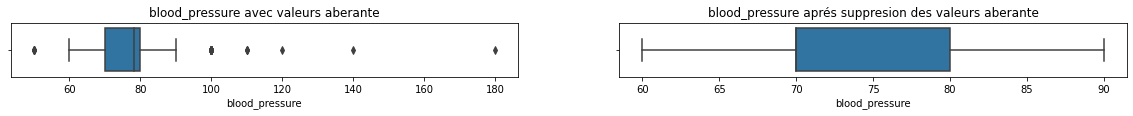

In [ ]:
# plot both together to compare

fig, ax=plt.subplots(1,2,figsize=(20,1))
sns.boxplot(df1["blood_pressure"],ax=ax[0])
ax[0].set_title("blood_pressure avec valeurs aberante")
sns.boxplot(new_dataset1["blood_pressure"],ax=ax[1])
ax[1].set_title("blood_pressure aprés suppresion des valeurs aberante")

Garder les valeurs abberantes de specific gravity

In [ ]:
#new_dataset1.dropna(inplace=True)
#new_dataset2 = remove_outliers_using_quantiles(new_dataset1, "specific_gravity", "inner")

interquartile range: 0.0050000000000001155
upper_inner_fence: 1.0275000000000003
lower_inner_fence: 1.0074999999999998
upper_outer_fence: 1.0350000000000004
lower_outer_fence: 0.9999999999999996
percentage of records out of inner fences: 1.65
percentage of records out of outer fences: 0.00
length of input dataframe: 364
length of new dataframe after outlier removal: 358


In [ ]:
# plot both together to compare

fig, ax=plt.subplots(1,2,figsize=(20,1))
sns.boxplot(df1["specific_gravity"],ax=ax[0])
ax[0].set_title("blood_pressure avec valeurs aberante")
sns.boxplot(new_dataset2["specific_gravity"],ax=ax[1])
ax[1].set_title("blood_pressure aprés suppresion des valeurs aberante")

supprimer les valeurs abberante de blood glucose random

In [ ]:
df.dropna(inplace=True)
new_dataset3 = remove_outliers_using_quantiles(new_dataset1, "blood_glucose_random", "inner")

interquartile range: 48.036516853932596
upper_inner_fence: 220.0912921348315
lower_inner_fence: 27.945224719101105
upper_outer_fence: 292.1460674157304
lower_outer_fence: -44.10955056179779
percentage of records out of inner fences: 11.81
percentage of records out of outer fences: 6.04
length of input dataframe: 364
length of new dataframe after outlier removal: 321


Text(0.5, 1.0, 'blood_glucose_random aprés suppresion des valeurs aberante')

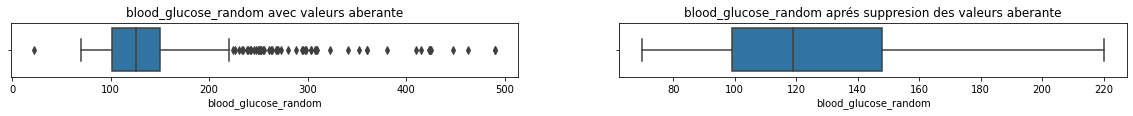

In [ ]:
# plot both together to compare

fig, ax=plt.subplots(1,2,figsize=(20,1))
sns.boxplot(df1["blood_glucose_random"],ax=ax[0])
ax[0].set_title("blood_glucose_random avec valeurs aberante")
sns.boxplot(new_dataset3["blood_glucose_random"],ax=ax[1])
ax[1].set_title("blood_glucose_random aprés suppresion des valeurs aberante")

supprimer les valeurs abbrante de blood urea

In [ ]:
df.dropna(inplace=True)
new_dataset4 = remove_outliers_using_quantiles(new_dataset3, "blood_urea", "inner")

interquartile range: 31.425721784776904
upper_inner_fence: 104.56430446194227
lower_inner_fence: -21.13858267716536
upper_outer_fence: 151.70288713910762
lower_outer_fence: -68.27716535433072
percentage of records out of inner fences: 10.59
percentage of records out of outer fences: 5.61
length of input dataframe: 321
length of new dataframe after outlier removal: 287


In [ ]:
df.dropna(inplace=True)
new_dataset4 = remove_outliers_using_quantiles(new_dataset4, "blood_urea", "inner")

interquartile range: 25.0
upper_inner_fence: 87.5
lower_inner_fence: -12.5
upper_outer_fence: 125.0
lower_outer_fence: -50.0
percentage of records out of inner fences: 4.18
percentage of records out of outer fences: 0.00
length of input dataframe: 287
length of new dataframe after outlier removal: 275


Text(0.5, 1.0, 'blood_urea aprés suppresion des valeurs aberante')

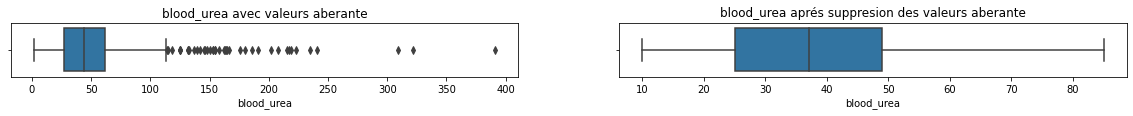

In [ ]:
# plot both together to compare

fig, ax=plt.subplots(1,2,figsize=(20,1))
sns.boxplot(df1["blood_urea"],ax=ax[0])
ax[0].set_title("blood_urea avec valeurs aberante")
sns.boxplot(new_dataset4["blood_urea"],ax=ax[1])
ax[1].set_title("blood_urea aprés suppresion des valeurs aberante")

Supprimer les valeurs abberante de serum creatinine

In [ ]:
df.dropna(inplace=True)
new_dataset5 = remove_outliers_using_quantiles(new_dataset4, "serum_creatinine", "inner")

interquartile range: 1.0
upper_inner_fence: 3.3
lower_inner_fence: -0.7
upper_outer_fence: 4.8
lower_outer_fence: -2.2
percentage of records out of inner fences: 5.82
percentage of records out of outer fences: 2.55
length of input dataframe: 275
length of new dataframe after outlier removal: 259


Text(0.5, 1.0, 'serum_creatinine aprés suppresion des valeurs aberante')

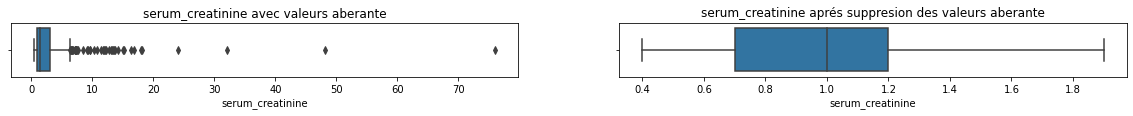

In [ ]:
# plot both together to compare

fig, ax=plt.subplots(1,2,figsize=(20,1))
sns.boxplot(df1["serum_creatinine"],ax=ax[0])
ax[0].set_title("serum_creatinine avec valeurs aberante")
sns.boxplot(new_dataset5["serum_creatinine"],ax=ax[1])
ax[1].set_title("serum_creatinine aprés suppresion des valeurs aberante")

Supprimer les valeurs abberantes de sodium

In [ ]:
df.dropna(inplace=True)
new_dataset6 = remove_outliers_using_quantiles(new_dataset5, "sodium", "inner")

interquartile range: 4.4712460063897765
upper_inner_fence: 148.70686900958466
lower_inner_fence: 130.82188498402556
upper_outer_fence: 155.41373801916933
lower_outer_fence: 124.1150159744409
percentage of records out of inner fences: 8.49
percentage of records out of outer fences: 0.77
length of input dataframe: 259
length of new dataframe after outlier removal: 237


Text(0.5, 1.0, 'sodium aprés suppresion des valeurs aberante')

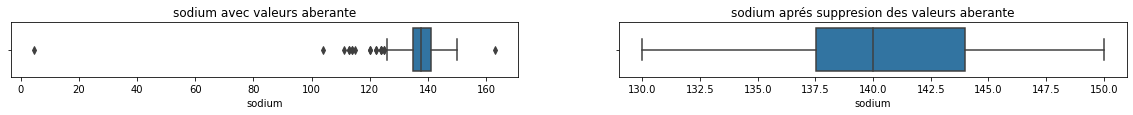

In [ ]:
# plot both together to compare

fig, ax=plt.subplots(1,2,figsize=(20,1))
sns.boxplot(df1["sodium"],ax=ax[0])
ax[0].set_title("sodium avec valeurs aberante")
sns.boxplot(new_dataset6["sodium"],ax=ax[1])
ax[1].set_title("sodium aprés suppresion des valeurs aberante")

Supprimer les valeurs abberantes de potassium

In [ ]:
df.dropna(inplace=True)
new_dataset7 = remove_outliers_using_quantiles(new_dataset6, "potassium", "inner")

interquartile range: 0.8999999999999999
upper_inner_fence: 6.1499999999999995
lower_inner_fence: 2.55
upper_outer_fence: 7.5
lower_outer_fence: 1.2000000000000002
percentage of records out of inner fences: 0.84
percentage of records out of outer fences: 0.00
length of input dataframe: 237
length of new dataframe after outlier removal: 235


Text(0.5, 1.0, 'potassium aprés suppresion des valeurs aberante')

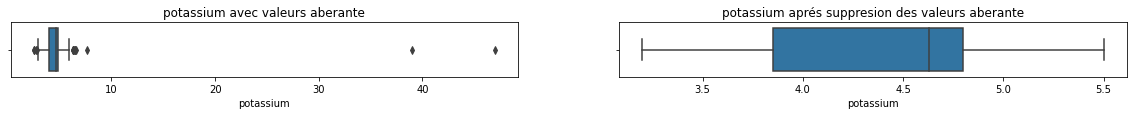

In [ ]:
# plot both together to compare

fig, ax=plt.subplots(1,2,figsize=(20,1))
sns.boxplot(df1["potassium"],ax=ax[0])
ax[0].set_title("potassium avec valeurs aberante")
sns.boxplot(new_dataset7["potassium"],ax=ax[1])
ax[1].set_title("potassium aprés suppresion des valeurs aberante")

Supprimer les valeurs abberantes de hemoglobine

In [ ]:
df.dropna(inplace=True)
new_dataset8 = remove_outliers_using_quantiles(new_dataset7, "hemoglobin", "inner")

interquartile range: 3.049999999999999
upper_inner_fence: 19.799999999999997
lower_inner_fence: 7.6000000000000005
upper_outer_fence: 24.374999999999993
lower_outer_fence: 3.025000000000002
percentage of records out of inner fences: 0.40
percentage of records out of outer fences: 0.00
length of input dataframe: 248
length of new dataframe after outlier removal: 247


Text(0.5, 1.0, 'haemoglobin aprés suppresion des valeurs aberante')

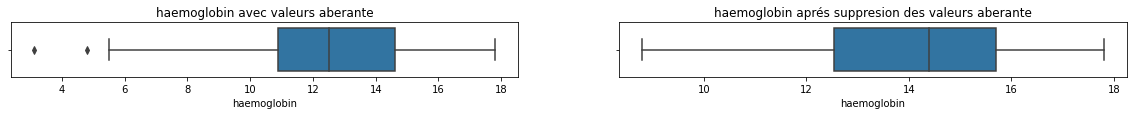

In [ ]:
# plot both together to compare

fig, ax=plt.subplots(1,2,figsize=(20,1))
sns.boxplot(df1["haemoglobin"],ax=ax[0])
ax[0].set_title("haemoglobin avec valeurs aberante")
sns.boxplot(new_dataset8["haemoglobin"],ax=ax[1])
ax[1].set_title("haemoglobin aprés suppresion des valeurs aberante")

Supprimer les valeurs abberantes de packed cell volume

In [ ]:
df.dropna(inplace=True)
new_dataset9 = remove_outliers_using_quantiles(new_dataset7, "packed_cell_volume", "inner")

interquartile range: 8.61550151975684
upper_inner_fence: 60.423252279635264
lower_inner_fence: 25.9612462006079
upper_outer_fence: 73.34650455927053
lower_outer_fence: 13.037993920972639
percentage of records out of inner fences: 1.28
percentage of records out of outer fences: 0.00
length of input dataframe: 235
length of new dataframe after outlier removal: 232


Text(0.5, 1.0, 'packed_cell_volume aprés suppresion des valeurs aberante')

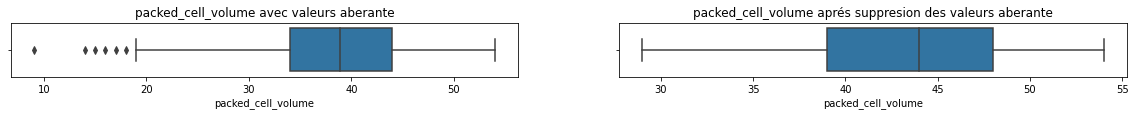

In [ ]:
# plot both together to compare

fig, ax=plt.subplots(1,2,figsize=(20,1))
sns.boxplot(df1["packed_cell_volume"],ax=ax[0])
ax[0].set_title("packed_cell_volume avec valeurs aberante")
sns.boxplot(new_dataset9["packed_cell_volume"],ax=ax[1])
ax[1].set_title("packed_cell_volume aprés suppresion des valeurs aberante")

supprimer les valeurs abberante de white blood cell count

In [ ]:
df.dropna(inplace=True)
new_dataset10 = remove_outliers_using_quantiles(new_dataset9, "white_blood_cell_count", "inner")

interquartile range: 2300.0
upper_inner_fence: 12550.0
lower_inner_fence: 3350.0
upper_outer_fence: 16000.0
lower_outer_fence: -100.0
percentage of records out of inner fences: 2.16
percentage of records out of outer fences: 1.29
length of input dataframe: 232
length of new dataframe after outlier removal: 227


Text(0.5, 1.0, 'white_blood_cell_count aprés suppresion des valeurs aberante')

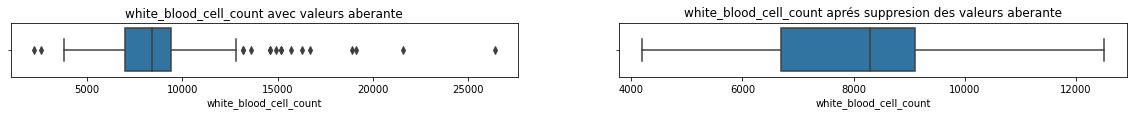

In [ ]:
# plot both together to compare

fig, ax=plt.subplots(1,2,figsize=(20,1))
sns.boxplot(df1["white_blood_cell_count"],ax=ax[0])
ax[0].set_title("white_blood_cell_count avec valeurs aberante")
sns.boxplot(new_dataset10["white_blood_cell_count"],ax=ax[1])
ax[1].set_title("white_blood_cell_count aprés suppresion des valeurs aberante")

Supprimer les valeurs abberantes pour red blood cell count

In [ ]:
df.dropna(inplace=True)
new_dataset11 = remove_outliers_using_quantiles(new_dataset10, "red_blood_cell_count", "inner")

interquartile range: 0.7925650557620809
upper_inner_fence: 6.688847583643121
lower_inner_fence: 3.5185873605947977
upper_outer_fence: 7.877695167286243
lower_outer_fence: 2.3297397769516763
percentage of records out of inner fences: 1.32
percentage of records out of outer fences: 0.00
length of input dataframe: 227
length of new dataframe after outlier removal: 224


Text(0.5, 1.0, 'red_blood_cell_count aprés suppresion des valeurs aberante')

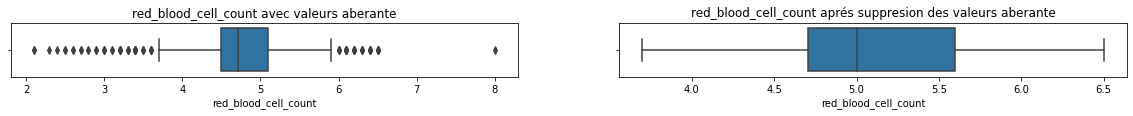

In [ ]:
# plot both together to compare

fig, ax=plt.subplots(1,2,figsize=(20,1))
sns.boxplot(df1["red_blood_cell_count"],ax=ax[0])
ax[0].set_title("red_blood_cell_count avec valeurs aberante")
sns.boxplot(new_dataset11["red_blood_cell_count"],ax=ax[1])
ax[1].set_title("red_blood_cell_count aprés suppresion des valeurs aberante")

In [ ]:
print_quantile_info(df, "hypertension")

interquartile range: 1.0
upper_inner_fence: 2.5
lower_inner_fence: -1.5
upper_outer_fence: 4.0
lower_outer_fence: -3.0
percentage of records out of inner fences: 0.00
percentage of records out of outer fences: 0.00


In [ ]:
print_quantile_info(df, "diabetes_mellitus")

interquartile range: 1.0
upper_inner_fence: 2.5
lower_inner_fence: -1.5
upper_outer_fence: 4.0
lower_outer_fence: -3.0
percentage of records out of inner fences: 0.00
percentage of records out of outer fences: 0.00


In [ ]:
print_quantile_info(df, "coronary_artery_disease")

interquartile range: 0.0
upper_inner_fence: 0.0
lower_inner_fence: 0.0
upper_outer_fence: 0.0
lower_outer_fence: 0.0
percentage of records out of inner fences: 8.50
percentage of records out of outer fences: 8.50


In [ ]:
print_quantile_info(df, "appetite")

interquartile range: 0.0
upper_inner_fence: 1.0
lower_inner_fence: 1.0
upper_outer_fence: 1.0
lower_outer_fence: 1.0
percentage of records out of inner fences: 20.50
percentage of records out of outer fences: 20.50


In [ ]:
print_quantile_info(df, "pedal_edema")

interquartile range: 0.0
upper_inner_fence: 0.0
lower_inner_fence: 0.0
upper_outer_fence: 0.0
lower_outer_fence: 0.0
percentage of records out of inner fences: 19.00
percentage of records out of outer fences: 19.00


In [ ]:
print_quantile_info(df, "anemia")

interquartile range: 0.0
upper_inner_fence: 0.0
lower_inner_fence: 0.0
upper_outer_fence: 0.0
lower_outer_fence: 0.0
percentage of records out of inner fences: 15.00
percentage of records out of outer fences: 15.00


In [ ]:
print_quantile_info(df, "classification")

interquartile range: 1.0
upper_inner_fence: 2.5
lower_inner_fence: -1.5
upper_outer_fence: 4.0
lower_outer_fence: -3.0
percentage of records out of inner fences: 0.00
percentage of records out of outer fences: 0.00


Telecharger la base de données aprés imputation des valeurs manquantes et suppression des valeurs abberantes


In [ ]:
from google.colab import files
new_dataset11.to_csv('data_set11.csv') 
files.download('data_set11.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
new_dataset11=pd.read_csv('/content/data_set11.csv')

In [ ]:
new_dataset11.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,224.0,48.117932,17.670192,2.000,35.000000,50.000000,61.000,80.000
blood_pressure,224.0,73.295632,9.020090,60.000,70.000000,70.000000,80.000,90.000
specific_gravity,224.0,1.019269,0.005108,1.005,1.015000,1.020000,1.025,1.025
albumin,224.0,0.536547,0.974772,0.000,0.000000,0.000000,1.000,4.000
sugar,224.0,0.117420,0.432681,0.000,0.000000,0.000000,0.000,3.000
red_blood_cells,224.0,0.058036,0.234335,0.000,0.000000,0.000000,0.000,1.000
pus_cell,224.0,0.089286,0.285794,0.000,0.000000,0.000000,0.000,1.000
pus_cell_clumps,224.0,0.035714,0.185992,0.000,0.000000,0.000000,0.000,1.000
bacteria,224.0,0.013393,0.115207,0.000,0.000000,0.000000,0.000,1.000
blood_glucose_random,224.0,118.749937,28.097541,70.000,99.000000,117.000000,134.750,220.000


### Normalisation

In [ ]:
train2 = new_dataset11.copy()
#train2['age'] = (train2['age']-train2['age'].min())/(train2['age'].max()-train2['age'].min())
train2['blood_pressure'] = (train2['blood_pressure']-train2['blood_pressure'].min())/(train2['blood_pressure'].max()-train2['blood_pressure'].min())
#train2['specific_gravity'] = (train2['specific_gravity']-train2['specific_gravity'].min())/(train2['specific_gravity'].max()-train2['specific_gravity'].min())
#train2['albumin'] = (train2['albumin']-train2['albumin'].min())/(train2['albumin'].max()-train2['albumin'].min())
train2['blood_glucose_random'] = (train2['blood_glucose_random']-train2['blood_glucose_random'].min())/(train2['blood_glucose_random'].max()-train2['blood_glucose_random'].min())
train2['blood_urea'] = (train2['blood_urea']-train2['blood_urea'].min())/(train2['blood_urea'].max()-train2['blood_urea'].min())
train2['serum_creatinine'] = (train2['serum_creatinine']-train2['serum_creatinine'].min())/(train2['serum_creatinine'].max()-train2['serum_creatinine'].min())
train2['sodium'] = (train2['sodium']-train2['sodium'].min())/(train2['sodium'].max()-train2['sodium'].min())
train2['potassium'] = (train2['potassium']-train2['potassium'].min())/(train2['potassium'].max()-train2['potassium'].min())
train2['hemoglobin'] = (train2['hemoglobin']-train2['hemoglobin'].min())/(train2['hemoglobin'].max()-train2['hemoglobin'].min())
train2['packed_cell_volume'] = (train2['packed_cell_volume']-train2['packed_cell_volume'].min())/(train2['packed_cell_volume'].max()-train2['packed_cell_volume'].min())
train2['white_blood_cell_count'] = (train2['white_blood_cell_count']-train2['white_blood_cell_count'].min())/(train2['white_blood_cell_count'].max()-train2['white_blood_cell_count'].min())
train2['red_blood_cell_count'] = (train2['red_blood_cell_count']-train2['red_blood_cell_count'].min())/(train2['red_blood_cell_count'].max()-train2['red_blood_cell_count'].min())

In [ ]:
new_dataset11.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
5,60.0,90.0,1.015,3.0,0.0,0.0,0.0,0.0,0.0,74.0,25.0,1.1,142.000000,3.200000,12.2,39.0,7800.0,4.4,1.0,1.0,0.0,1.0,1.0,0.0,1
19,62.0,60.0,1.015,1.0,0.0,0.0,1.0,1.0,0.0,100.0,31.0,1.6,137.528754,4.627244,10.3,30.0,5300.0,3.7,1.0,0.0,1.0,1.0,0.0,0.0,1
25,61.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,108.0,75.0,1.9,141.000000,5.200000,9.9,29.0,8400.0,3.7,1.0,1.0,0.0,1.0,0.0,1.0,1


In [ ]:
train2.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,0.666667,1.020,1.0,0.0,0.0,0.0,0.0,0.0,0.342282,0.293454,0.228571,0.442868,0.664324,0.800000,0.615385,0.433735,0.555556,1.0,1.0,0.0,1.0,0.0,0.0,1
4,51.0,0.666667,1.010,2.0,0.0,0.0,0.0,0.0,0.0,0.241611,0.180587,0.285714,0.442868,0.664324,0.483333,0.269231,0.373494,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,1
5,60.0,1.000000,1.015,3.0,0.0,0.0,0.0,0.0,0.0,0.026846,0.169300,0.200000,0.705882,0.115385,0.533333,0.423077,0.433735,0.259259,1.0,1.0,0.0,1.0,1.0,0.0,1
16,47.0,0.333333,1.015,2.0,0.0,0.0,0.0,0.0,0.0,0.194631,0.406321,0.514286,0.470588,0.461538,0.566667,0.418635,0.506762,0.373124,0.0,0.0,0.0,1.0,0.0,0.0,1
19,62.0,0.000000,1.015,1.0,0.0,0.0,1.0,1.0,0.0,0.201342,0.237020,0.342857,0.442868,0.664324,0.375000,0.076923,0.132530,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data_age')

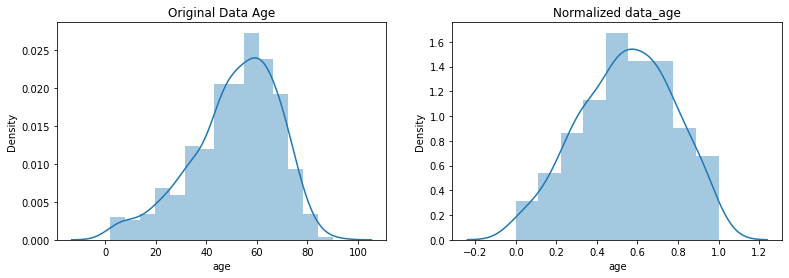

In [ ]:
# normalize the exponential data with boxcox
#normalized_data_age = stats.boxcox(data_age)

# plot both together to compare
fig, ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(df["age"],ax=ax[0])
ax[0].set_title("Original Data Age")
sns.distplot(train2["age"],ax=ax[1])
ax[1].set_title("Normalized data_age")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data_sodium')

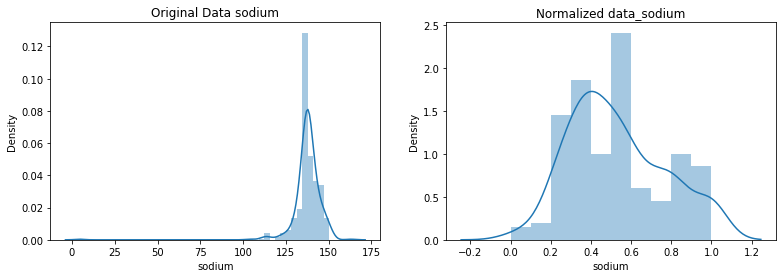

In [ ]:
# normalize the exponential data with boxcox
#normalized_data_age = stats.boxcox(data_age)

# plot both together to compare
fig, ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(df["sodium"],ax=ax[0])
ax[0].set_title("Original Data sodium")
sns.distplot(train2["sodium"],ax=ax[1])
ax[1].set_title("Normalized data_sodium")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data_potassium')

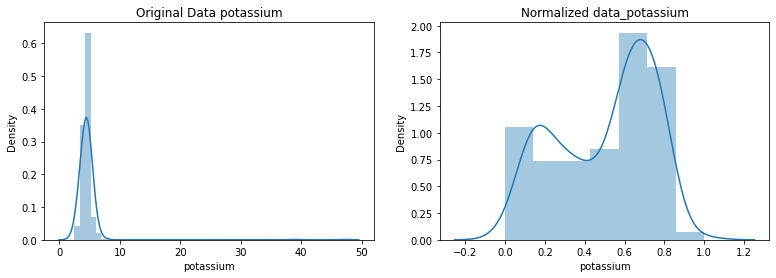

In [ ]:
# normalize the exponential data with boxcox
#normalized_data_age = stats.boxcox(data_age)

# plot both together to compare
fig, ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(df["potassium"],ax=ax[0])
ax[0].set_title("Original Data potassium")
sns.distplot(train2["potassium"],ax=ax[1])
ax[1].set_title("Normalized data_potassium")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data_blood_pressure')

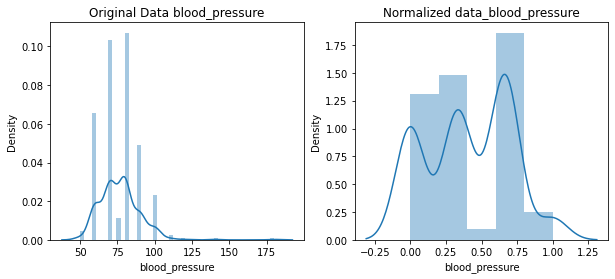

In [ ]:
# normalize the exponential data with boxcox
#normalized_data_packed_cell_volume = stats.boxcox(data_packed_cell_volume)

# plot both together to compare
fig, ax=plt.subplots(1,2,figsize=(10,4))
sns.distplot(df["blood_pressure"],ax=ax[0])
ax[0].set_title("Original Data blood_pressure")
sns.distplot(train2["blood_pressure"],ax=ax[1])
ax[1].set_title("Normalized data_blood_pressure")

### Chercher les correlation 

In [ ]:
train_corr=train2.copy()

In [ ]:
train_corr.drop(["specific_gravity","albumin","sugar","red_blood_cells","pus_cell","pus_cell_clumps",
             "bacteria","hypertension","diabetes_mellitus","coronary_artery_disease","appetite",
             "pedal_edema","anemia"],axis=1,inplace=True)

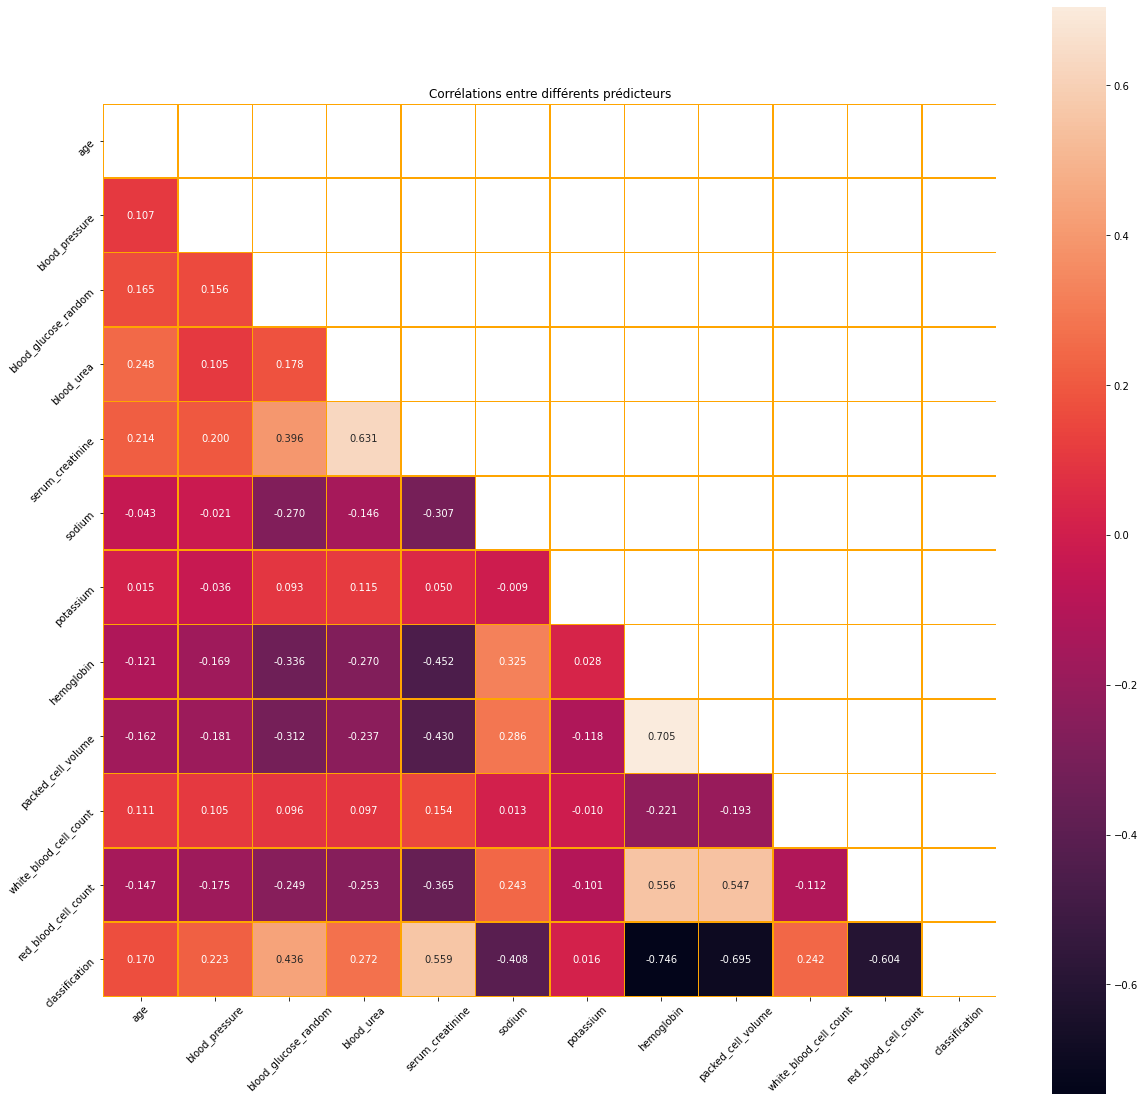

In [ ]:
corr = train_corr.corr()
f,ax=plt.subplots(figsize=(20,20))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,fmt=".3f",ax=ax,linewidths=0.5,linecolor="orange", mask = mask, square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Corrélations entre différents prédicteurs')
plt.show()

La correlation sur la figure ci-aprés

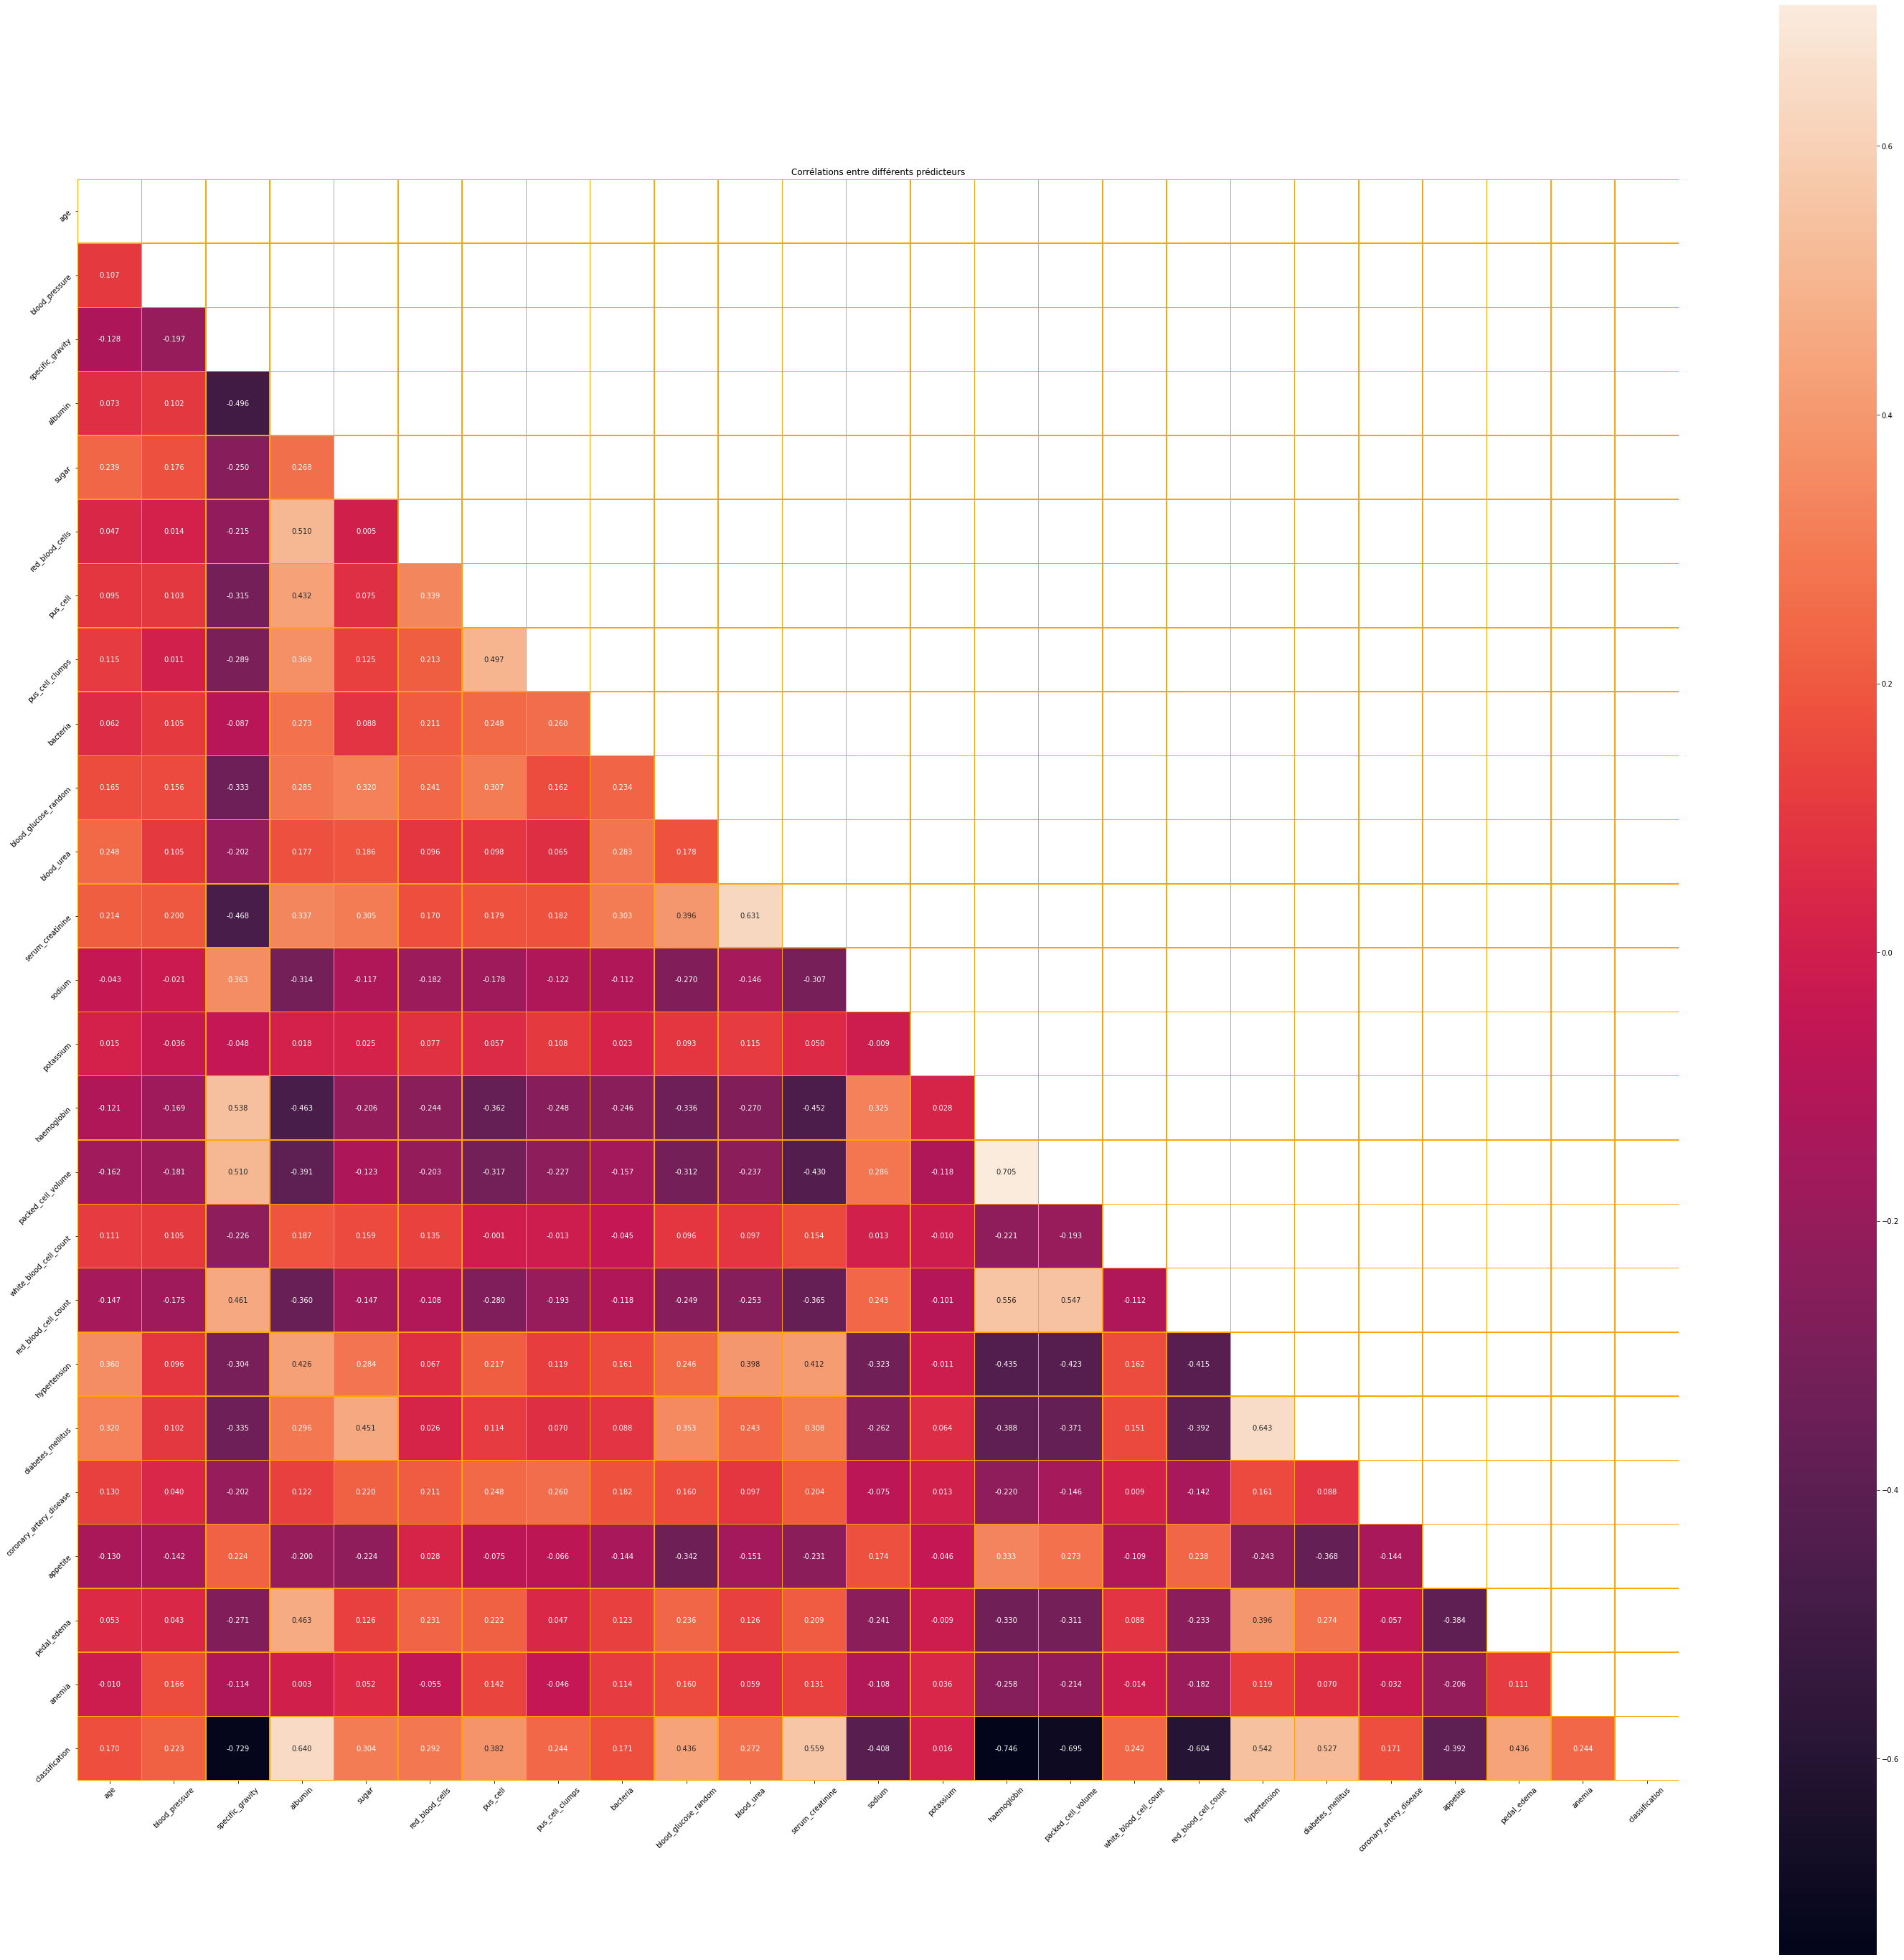

In [ ]:
corr = train2.corr()
f,ax=plt.subplots(figsize=(50,50))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,fmt=".3f",ax=ax,linewidths=0.5,linecolor="orange", mask = mask, square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Corrélations entre différents prédicteurs')
plt.show()

In [ ]:
train3=train2.copy()

Supprimer les variables fortement corrélé ; "specific gravity","albumin","hemoglobin" et packed cell volum qui ont un coefficient de corrélation respectivement de 68,5%; 67,7%; 70,1% et 66,4%

In [ ]:
train3.drop(["hemoglobin","packed_cell_volume"],axis=1,inplace=True)


In [ ]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 399
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      228 non-null    float64
 1   blood_pressure           228 non-null    float64
 2   specific_gravity         228 non-null    float64
 3   albumin                  228 non-null    float64
 4   sugar                    228 non-null    float64
 5   red_blood_cells          228 non-null    float64
 6   pus_cell                 228 non-null    float64
 7   pus_cell_clumps          228 non-null    float64
 8   bacteria                 228 non-null    float64
 9   blood_glucose_random     228 non-null    float64
 10  blood_urea               228 non-null    float64
 11  serum_creatinine         228 non-null    float64
 12  sodium                   228 non-null    float64
 13  potassium                228 non-null    float64
 14  white_blood_cell_count   2

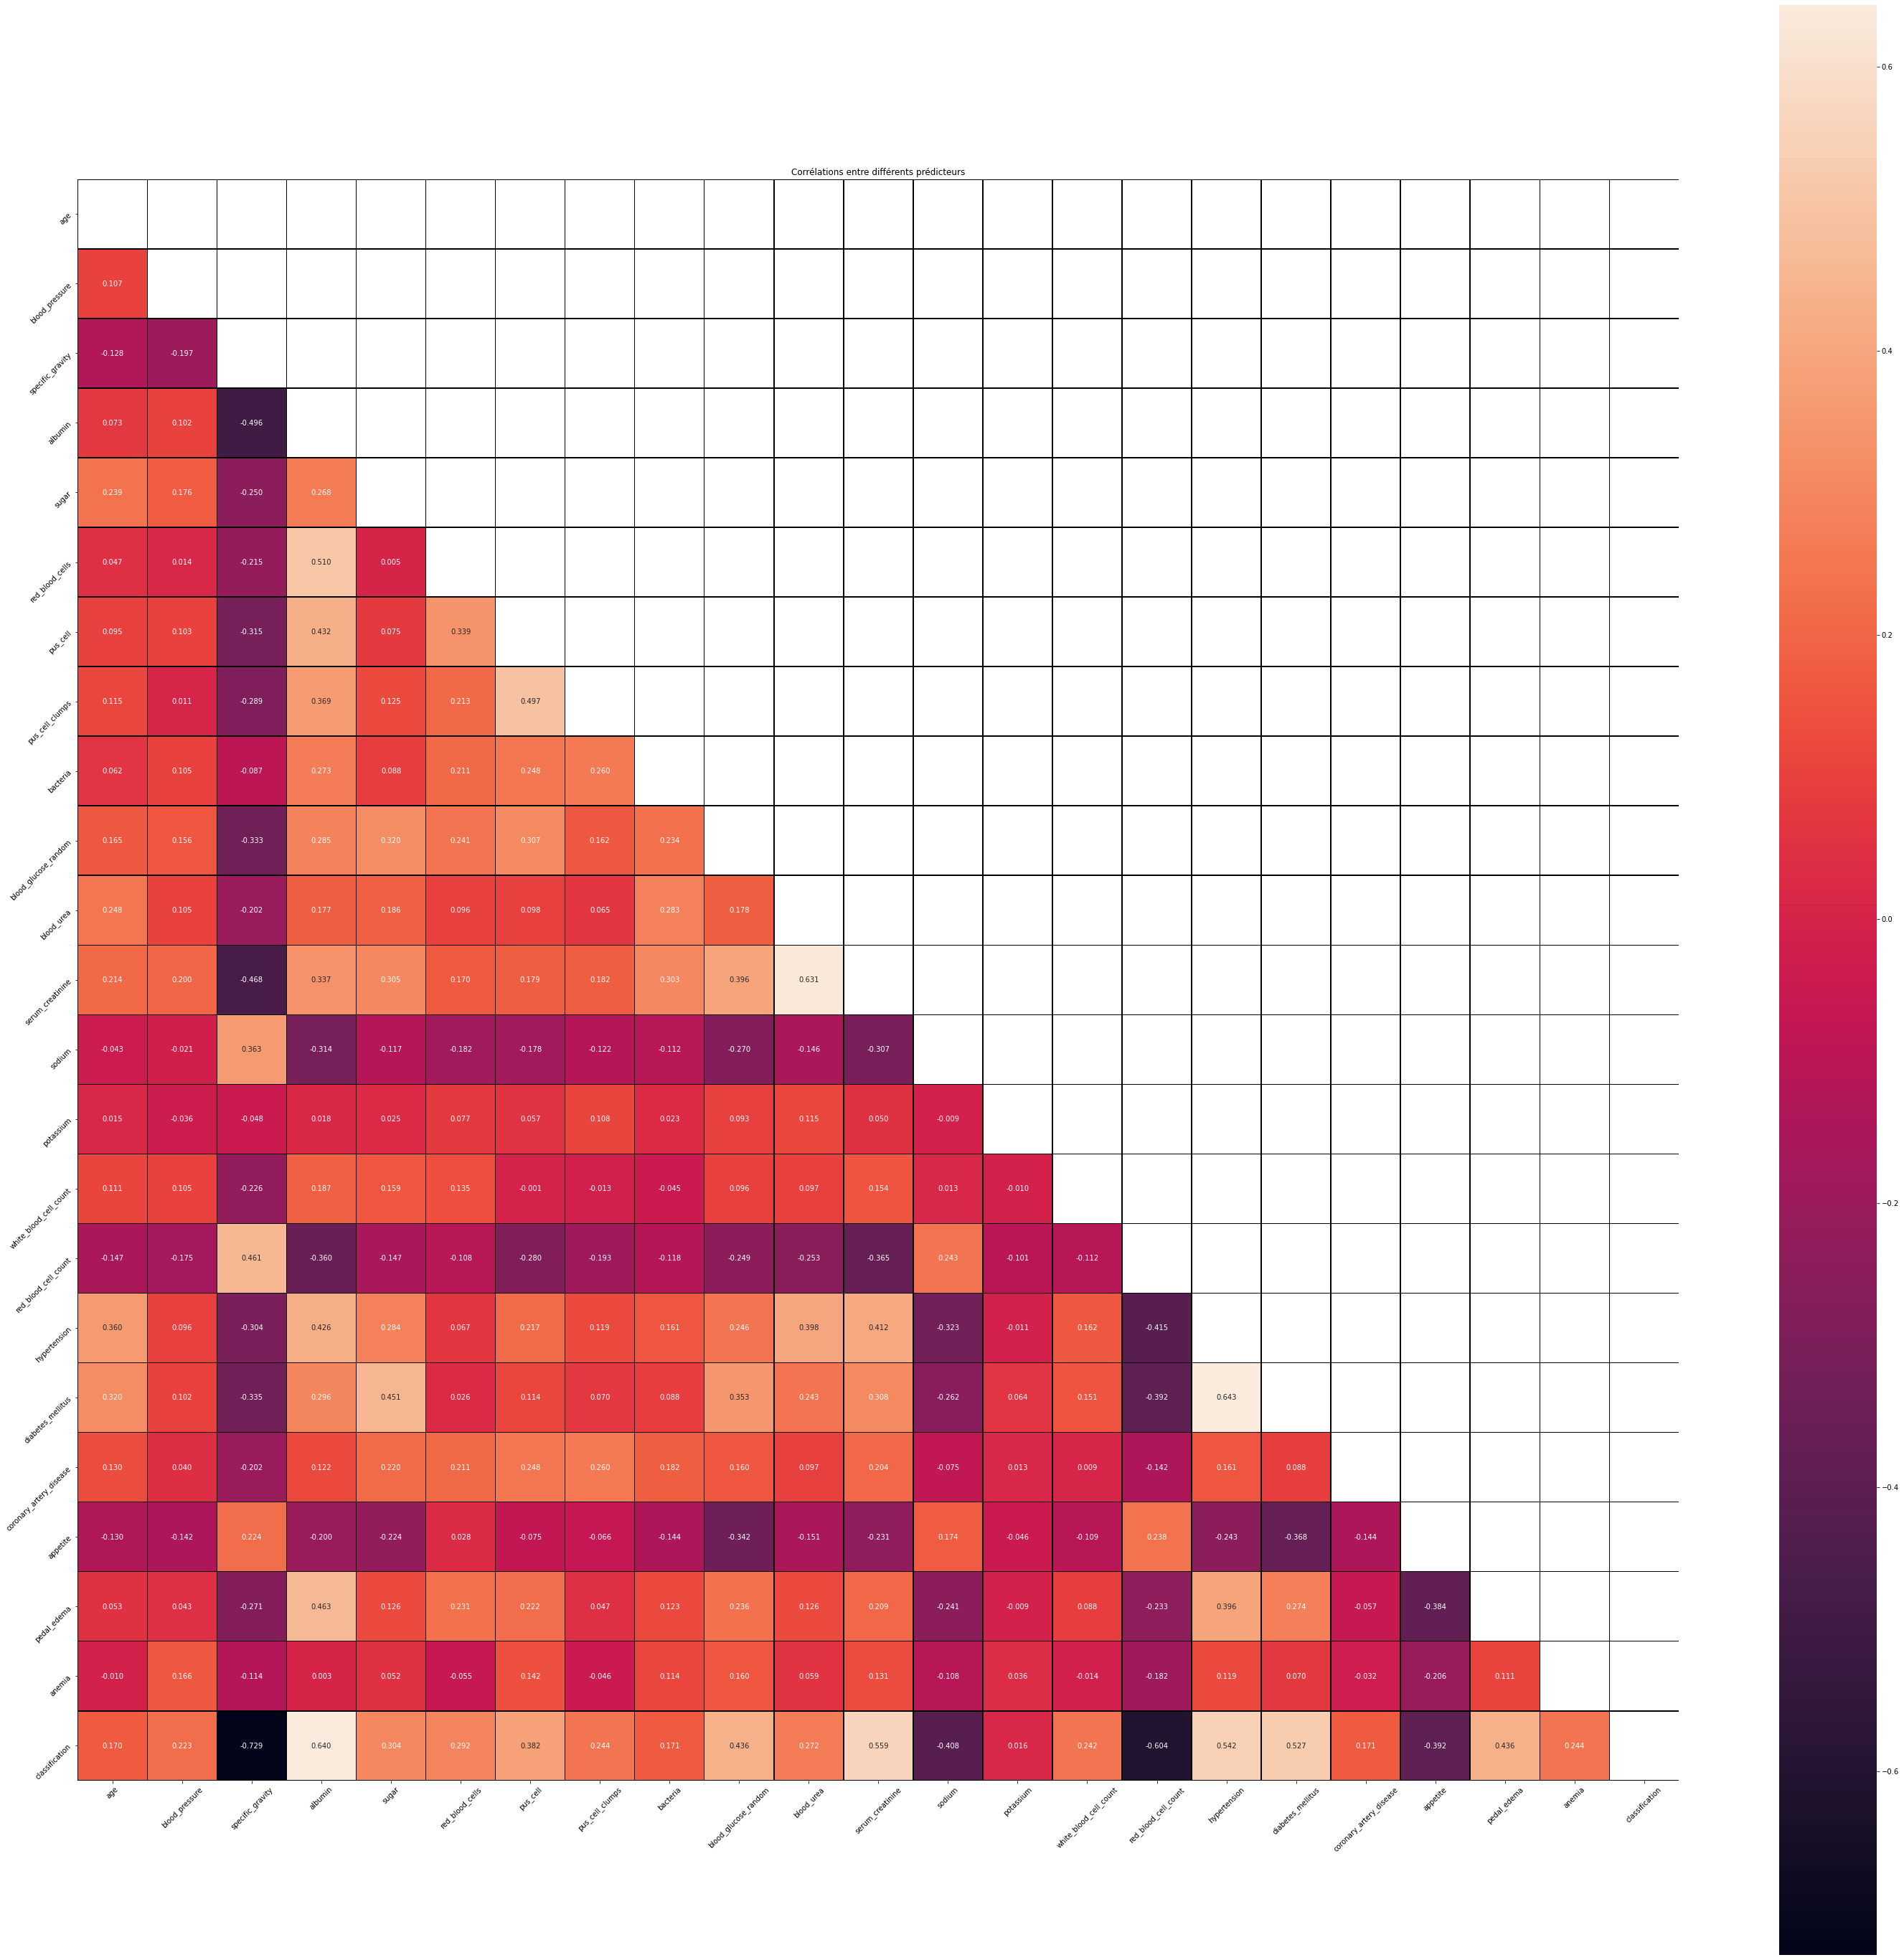

In [ ]:
corr1 = train3.corr()
f,ax=plt.subplots(figsize=(50,50))
mask = np.zeros_like(corr1)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr1,annot=True,fmt=".3f",ax=ax,linewidths=0.5,linecolor="black", mask = mask, square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Corrélations entre différents prédicteurs')
plt.show()

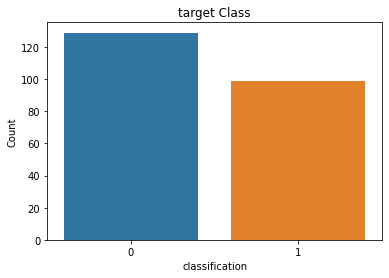

0    129
1     99
Name: classification, dtype: int64

In [ ]:
sns.countplot(x='classification',data=train3)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()

train3['classification'].value_counts()

In [ ]:
train3.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,228.0,48.951463,18.024107,2.000,36.000000,51.000000,62.000000,90.000
blood_pressure,228.0,0.451494,0.306654,0.000,0.333333,0.333333,0.666667,1.000
specific_gravity,228.0,1.019029,0.005228,1.005,1.015000,1.020000,1.025000,1.025
albumin,228.0,0.588611,0.996506,0.000,0.000000,0.000000,1.000000,4.000
sugar,228.0,0.134878,0.454501,0.000,0.000000,0.000000,0.000000,3.000
red_blood_cells,228.0,0.061404,0.240597,0.000,0.000000,0.000000,0.000000,1.000
pus_cell,228.0,0.100877,0.301829,0.000,0.000000,0.000000,0.000000,1.000
pus_cell_clumps,228.0,0.043860,0.205233,0.000,0.000000,0.000000,0.000000,1.000
bacteria,228.0,0.021930,0.146777,0.000,0.000000,0.000000,0.000000,1.000
blood_glucose_random,228.0,0.336013,0.191032,0.000,0.194631,0.322148,0.464765,1.000


### **2.3** **Modele**

Split des données 

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# import library
#from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(random_state=42)

#x_ros = ros.fit_resample(train3)


#print('Original dataset shape', train3.shape)
#print('Resample dataset shape', x_ros.shape)

In [ ]:
#from collections import Counter
#print('Original dataset shape', Counter(y_train))
#print('Resample dataset shape', Counter(y_ros))

Equilibrer les données 

In [ ]:
# class count
class_count_0, class_count_1 = train3['classification'].value_counts()

# Separate class
class_0 = train3[train3['classification'] == 0]
class_1 = train3[train3['classification'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (129, 24)
class 1: (99, 24)


total class of 1 and 0: 1    129
0    129
Name: classification, dtype: int64


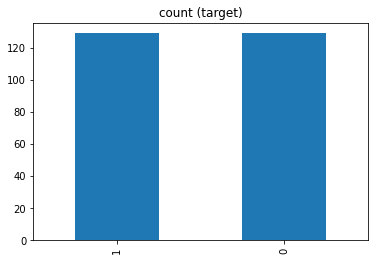

In [ ]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_over['classification'].value_counts())# plot the count after under-sampeling
test_over['classification'].value_counts().plot(kind='bar', title='count (target)')

In [ ]:
test_over

,age,blood_pressure,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
151,76.0,1.000000,0.450142,0.0,0.0,0.0,0.0,0.684564,0.537313,0.866667,0.550000,1.000000,0.506762,0.359798,1.0,1.0,0.0,1.0,0.0,1.0,1
151,76.0,1.000000,0.450142,0.0,0.0,0.0,0.0,0.684564,0.537313,0.866667,0.550000,1.000000,0.506762,0.359798,1.0,1.0,0.0,1.0,0.0,1.0,1
194,80.0,0.333333,0.450142,0.0,1.0,0.0,0.0,0.523735,0.582090,0.533333,0.376438,0.620541,0.506762,0.359798,1.0,1.0,0.0,1.0,0.0,0.0,1
119,60.0,0.333333,0.000000,0.0,0.0,0.0,0.0,0.469799,0.253731,0.533333,0.376438,0.620541,0.506762,0.359798,0.0,0.0,0.0,1.0,0.0,0.0,1
150,8.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.053691,0.253731,0.333333,0.376438,0.620541,0.301205,0.359798,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,0.666667,0.000000,0.0,0.0,0.0,0.0,0.469799,0.582090,0.066667,1.000000,0.739130,0.301205,0.428571,0.0,0.0,0.0,1.0,0.0,0.0,0
396,42.0,0.333333,0.000000,0.0,0.0,0.0,0.0,0.033557,0.313433,0.533333,0.550000,0.130435,0.433735,0.892857,0.0,0.0,0.0,1.0,0.0,0.0,0
397,12.0,0.666667,0.000000,0.0,0.0,0.0,0.0,0.201342,0.238806,0.133333,0.350000,0.521739,0.289157,0.607143,0.0,0.0,0.0,1.0,0.0,0.0,0
398,17.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.295302,0.597015,0.400000,0.250000,0.739130,0.361446,0.785714,0.0,0.0,0.0,1.0,0.0,0.0,0


In [ ]:
from google.colab import files
test_over.to_csv('test_over.csv') 
files.download('test_over.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test_over = pd.read_csv('/content/test_over.csv')


test_over.info()



# code à exécuter

In [ ]:
test_over.drop(['Unnamed: 0'],1,inplace=True)
test_over.drop(['Unnamed: 0.1'],1,inplace=True)

test_over.info()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(test_over.iloc[:,:-1], test_over['classification'], 
                                                    test_size = 0.33, random_state=44,
                                                   stratify= test_over['classification'] )

In [ ]:
print(X_train.shape)
print(X_test.shape)

(172, 23)
(86, 23)


Les données ne sont pas equilibré !!

In [ ]:
y_train.value_counts()

1    86
0    86
Name: classification, dtype: int64

Construction du modele

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('XGBClassifier', XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Neural Network', MLPClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LogisticRegression: 1.000000 (0.000000)
DecisionTreeClassifier: 1.000000 (0.000000)
XGBClassifier: 1.000000 (0.000000)
GradientBoostingClassifier: 1.000000 (0.000000)
KNeighborsClassifier: 1.000000 (0.000000)
GaussianNB: 0.937255 (0.063567)
SVM: 0.982680 (0.026471)
Neural Network: 0.833333 (0.185539)
RandomForestClassifier: 1.000000 (0.000000)


### **2.4** **Evaluation du Modele**

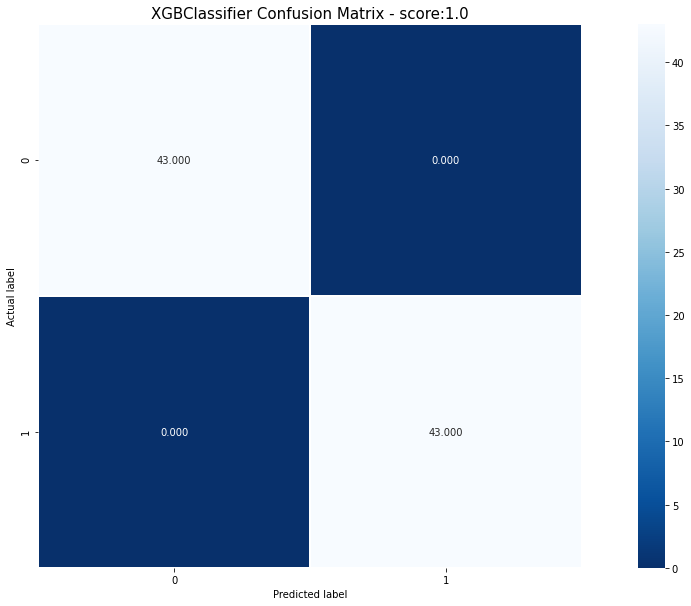

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        43

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



In [ ]:
model=GradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'XGBClassifier Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

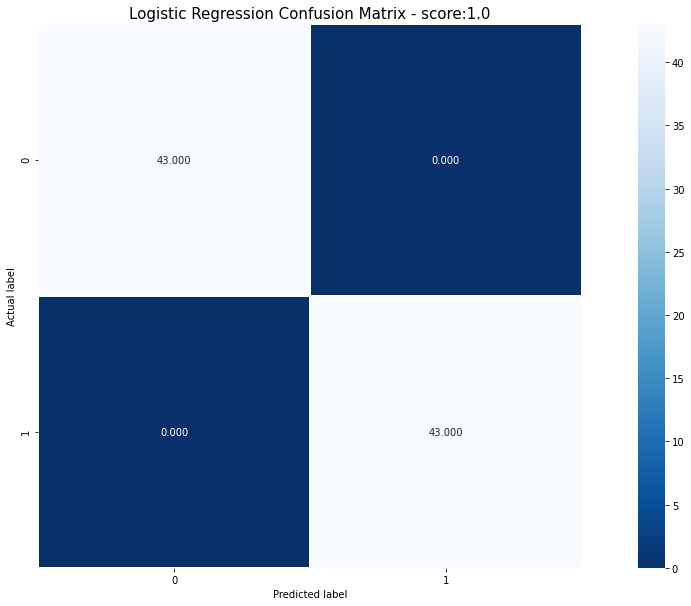

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        43

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Logistic Regression Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

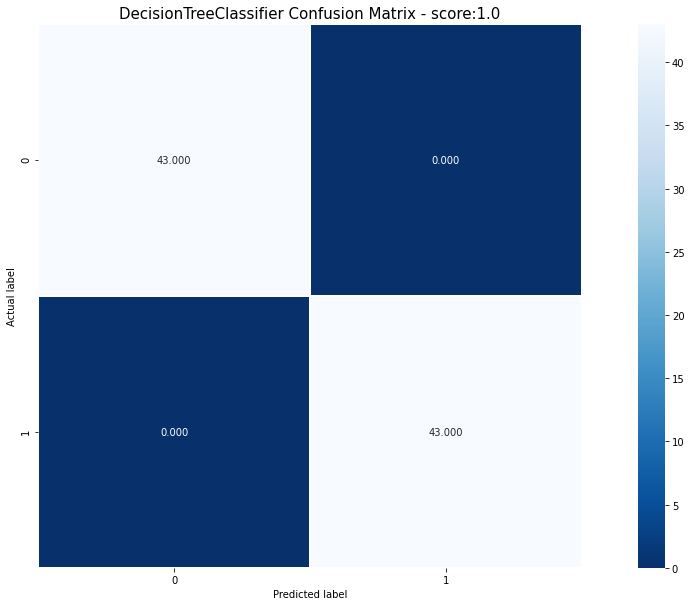

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        43

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



In [ ]:
model=DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Decision Tree Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))


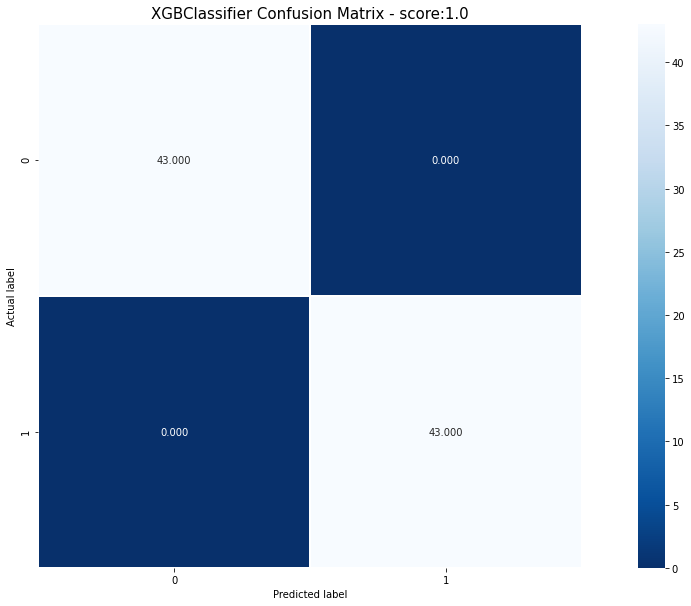

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        43

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



In [ ]:
model=XGBClassifier(random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'XGBClassifier Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))


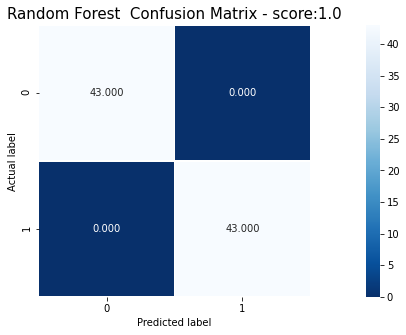

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        43

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



In [ ]:
model2=RandomForestClassifier(random_state=0)
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)

from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Random Forest  Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))


### **2.5** **Deploiement du modele**

Le deploiement de notre modele est faite sur FastAPIse qu'est un framework web pour creer des API sous python, qui offre des serveurs prêt à utiliser. 


In [ ]:
!pip install colabcode

In [ ]:
!pip install fastapi

In [ ]:
import pickle
Pkl_Filename = "model_random.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model2, file)

## code à exexuter

In [ ]:
files.download('model_random.pkl')

In [ ]:
from pydantic import BaseModel

class ckd (BaseModel):
    age: float 
    blood_pressure: float 
    sugar: float 
    red_blood_cells: float 
    pus_cell: float 
    pus_cell_clumps: float 
    bacteria: float
    blood_glucose_random: float
    blood_urea: float
    serum_creatinine: float
    sodium: float
    potassium: float
    white_blood_cell_count: float
    red_blood_cell_count: float
    hypertension: float
    diabetes_mellitus: float
    coronary_artery_disease: float
    appetite: float
    pedal_edema: float
    anemia: float




  
    class Config:
        schema_extra = {
            "example": {
                "age": 25, 
                "blood_pressure": 74, 
                "sugar": 0.25,
                "red_blood_cells": 0,
                "pus_cell": 0,
                "pus_cell_clumps": 0,
                "bacteria": 0,
                "blood_glucose_random": 0.380, 
                "blood_urea": 0.542950, 
                "serum_creatinine": 0.669215,
                "sodium": 0.200006,
                "potassium": 0.675610,
                "white_blood_cell_count": 0.391221,
                "red_blood_cell_count": 0.894,
                "hypertension": 0,
                "diabetes_mellitus": 0, 
                "coronary_artery_disease": 0, 
                "appetite": 1,
                "pedal_edema": 0,
                "anemia": 0
            }
        }

In [ ]:
from fastapi import FastAPI
app = FastAPI()

@app.on_event("startup")
def load_model():
    global model
    model = pickle.load(open("model_random.pkl", "rb"))

@app.get('/')
def index():
    return {'message': 'This is the homepage of the API '}


@app.post('/predict')
def ckd_model(data: ckd):
    received = data.dict()
    age = received['age']
    blood_pressure = received['blood_pressure']
    sugar = received['sugar']
    red_blood_cells = received['red_blood_cells']
    pus_cell = received['pus_cell']
    pus_cell_clumps = received['pus_cell_clumps']
    bacteria = received['bacteria']
    blood_glucose_random = received['blood_glucose_random']
    blood_urea = received['blood_urea']
    serum_creatinine = received['serum_creatinine']
    sodium = received['sodium']
    potassium = received['potassium']
    white_blood_cell_count = received['white_blood_cell_count']
    red_blood_cell_count = received['red_blood_cell_count']
    hypertension = received['hypertension']
    diabetes_mellitus = received['diabetes_mellitus']
    coronary_artery_disease = received['coronary_artery_disease']
    appetite = received['appetite']
    pedal_edema = received['pedal_edema']
    anemia = received['anemia']
    pred_name = model.predict([[age, blood_pressure,
                                sugar, red_blood_cells, pus_cell, pus_cell_clumps,
                                bacteria, blood_glucose_random, blood_urea,
                                serum_creatinine, sodium, potassium,
                                white_blood_cell_count, red_blood_cell_count,
                                hypertension, diabetes_mellitus,
                                coronary_artery_disease, appetite, pedal_edema,
                                anemia]]).tolist()[0]
    return {'prediction': pred_name} 

In [ ]:
from colabcode import ColabCode
server = ColabCode(port=10000, code=False)

In [ ]:
server.run_app(app=app)

Public URL: NgrokTunnel: "http://e18c9e1fd7fd.ngrok.io" -> "http://localhost:10000"


INFO:     Started server process [513]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:10000 (Press CTRL+C to quit)


INFO:     197.153.83.68:0 - "GET / HTTP/1.1" 200 OK
INFO:     197.153.83.68:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     197.153.83.68:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     197.153.83.68:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     197.153.83.68:0 - "POST /predict HTTP/1.1" 200 OK
INFO:     197.153.83.68:0 - "GET /predict HTTP/1.1" 405 Method Not Allowed


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [513]
